# 1. Project Overview

## 1.1 Business Context
This analysis is conducted for an Irish furniture chain seeking to identify distinct customer segments within their existing customer base. The company has collected customer data from 2021, including:
- Spending patterns on furniture and garden products
- Living situation details (apartment size, garden size, pool ownership)
- Customer interests gathered through telephone interviews

## 1.2 Project Objectives
The main objectives of this analysis are to:
1. Develop a customer segmentation model using available customer data
2. Identify meaningful patterns and relationships in customer behavior
3. Create actionable insights for targeted marketing strategies
4. Provide recommendations for future data collection and analysis

## 1.3 Available Data
The analysis will utilize two primary data sources:

**Customer Data (customers.csv)**:
- Customer identification information
- Annual purchase amounts
- Living situation details (apartment/house size, garden size, pool ownership)
- Spending breakdown (furniture vs. garden products)

**Marketing Data (marketing_info.csv)**:
- Customer product interests from surveys
- Survey dates
- Interest indicators for garden, pool, and balcony products

## 1.4 Analytical Approach
The analysis will follow these key steps:
1. Data preprocessing and quality assessment
2. Feature engineering and selection
3. Cluster model development and validation
4. Customer segment interpretation and profiling
5. Recommendations for targeted marketing strategies

## 1.5 Expected Outcomes
This analysis aims to deliver:
- A robust clustering model identifying distinct customer segments
- Detailed profiles of each customer segment
- Insights into customer preferences and behavior patterns
- Recommendations for targeted marketing approaches

# 2. Imports, Data Loading, Initial Data Inspection

In [1]:
# 2.1 Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from numpy.random import uniform
from math import isnan

# For modeling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.neighbors import NearestNeighbors

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plot style and figure size
sns.set_theme()  # This sets the seaborn theme for plotting
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size

In [2]:
# 2. Initial Data Loading and Analysis

# 2.1 Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [33]:
# 2.2 Load and Initial Inspection of Datasets

# Load customer data
customer_df = pd.read_csv('Customers.csv')
marketing_df = pd.read_csv('Marketing_info.csv')

def analyze_dataset(df, name):
    """
    Comprehensive analysis of dataset including nulls, unique values,
    and basic statistics for all columns.
    """
    print(f"\n{'='*50}")
    print(f"{name} Analysis")
    print(f"{'='*50}")

    # Basic dataset information
    print(f"\nDataset Shape: {df.shape}")

    # Analyze each column
    print("\nColumn Analysis:")
    for column in df.columns:
        print(f"\n{'-'*30}")
        print(f"Column: {column}")
        print(f"Type: {df[column].dtype}")
        print(f"Null Values: {df[column].isnull().sum()} ({(df[column].isnull().sum()/len(df))*100:.2f}%)")
        print(f"Unique Values: {df[column].nunique()}")

        # For numeric columns
        if df[column].dtype in ['int64', 'float64']:
            print("\nNumeric Statistics:")
            print(f"Min: {df[column].min()}")
            print(f"Max: {df[column].max()}")
            print(f"Mean: {df[column].mean():.2f}")
            print(f"Median: {df[column].median()}")
            print(f"Standard Deviation: {df[column].std():.2f}")

            # Check for negative values
            neg_count = len(df[df[column] < 0])
            if neg_count > 0:
                print(f"WARNING: {neg_count} negative values found")

        # For boolean columns
        elif df[column].dtype == 'bool':
            print("\nValue Counts:")
            print(df[column].value_counts(dropna=False))

        # For categorical/object columns
        else:
            if df[column].nunique() < 10:  # Only show distribution for low-cardinality columns
                print("\nValue Distribution:")
                print(df[column].value_counts(dropna=False).head())

In [23]:
# 2.3 Analyze Customer Dataset
analyze_dataset(customer_df, "Customer Dataset")


Customer Dataset Analysis

Dataset Shape: (10000, 9)

Column Analysis:

------------------------------
Column: Cust_ID
Type: object
Null Values: 0 (0.00%)
Unique Values: 10000

------------------------------
Column: sum_purchases_last_year
Type: float64
Null Values: 0 (0.00%)
Unique Values: 10000

Numeric Statistics:
Min: 1794.8189725298846
Max: 17693.694693672966
Mean: 6511.12
Median: 3893.342787042703
Standard Deviation: 3790.59

------------------------------
Column: size_apartment_house
Type: float64
Null Values: 1579 (15.79%)
Unique Values: 487

Numeric Statistics:
Min: -10.0
Max: 610.0
Mean: 138.40
Median: 136.0
Standard Deviation: 83.59

------------------------------
Column: garden_size
Type: float64
Null Values: 2000 (20.00%)
Unique Values: 833

Numeric Statistics:
Min: -11.0
Max: 3448.0
Mean: 264.18
Median: 15.0
Standard Deviation: 680.51

------------------------------
Column: pool
Type: bool
Null Values: 0 (0.00%)
Unique Values: 2

Value Counts:
pool
False    6000
True    

In [5]:
customer_df.shape

(10000, 9)

In [6]:
marketing_df.shape

(30000, 5)

In [24]:
# 2.4 Analyze Marketing Dataset
analyze_dataset(marketing_df, "Marketing Dataset")


Marketing Dataset Analysis

Dataset Shape: (30000, 5)

Column Analysis:

------------------------------
Column: Customer_Name
Type: object
Null Values: 0 (0.00%)
Unique Values: 9508

------------------------------
Column: Survey_Date
Type: object
Null Values: 0 (0.00%)
Unique Values: 323

------------------------------
Column: Garden_interest
Type: bool
Null Values: 0 (0.00%)
Unique Values: 2

Value Counts:
Garden_interest
True     15028
False    14972
Name: count, dtype: int64

------------------------------
Column: Pool_interest
Type: bool
Null Values: 0 (0.00%)
Unique Values: 2

Value Counts:
Pool_interest
False    15021
True     14979
Name: count, dtype: int64

------------------------------
Column: Balcony_interest
Type: bool
Null Values: 0 (0.00%)
Unique Values: 2

Value Counts:
Balcony_interest
True     15036
False    14964
Name: count, dtype: int64


In [25]:
# 2.5 Check Relationship Between Datasets
print("\nDataset Relationship Analysis")
print("="*50)
print(f"\nUnique customers in customer dataset: {customer_df['Cust_ID'].nunique()}")
print(f"Unique customers in marketing dataset: {marketing_df['Customer_Name'].nunique()}")

# Check survey frequency per customer
survey_freq = marketing_df['Customer_Name'].value_counts()
print(f"\nSurvey frequency per customer:")
print(f"Min surveys per customer: {survey_freq.min()}")
print(f"Max surveys per customer: {survey_freq.max()}")
print(f"Average surveys per customer: {survey_freq.mean():.2f}")


Dataset Relationship Analysis

Unique customers in customer dataset: 10000
Unique customers in marketing dataset: 9508

Survey frequency per customer:
Min surveys per customer: 1
Max surveys per customer: 11
Average surveys per customer: 3.16


In [26]:
# 2.6 Analyze Key Business Metrics
print("\nKey Business Metrics")
print("="*50)

# Spending patterns
print("\nSpending Patterns:")
spending_stats = customer_df[['sum_purchases_last_year', 'spending_furniture', 'spending_garden']].describe()
print(spending_stats)

# Living situation analysis
print("\nLiving Situation Analysis:")
print("\nPool ownership vs Garden size correlation:")
garden_by_pool = customer_df.groupby('pool')['garden_size'].describe()
print(garden_by_pool)


Key Business Metrics

Spending Patterns:
       sum_purchases_last_year  spending_furniture  spending_garden
count                 10000.00            10000.00         10000.00
mean                   6511.12             4236.31          2274.81
std                    3790.59             3376.19          2790.82
min                    1794.82               -3.72         -8148.67
25%                    3005.85             1289.04           417.18
50%                    3893.34             2694.90          1836.01
75%                   10002.48             7352.15          2974.47
max                   17693.69            15058.68         13927.21

Living Situation Analysis:

Pool ownership vs Garden size correlation:
        count   mean    std    min   25%   50%   75%     max
pool                                                        
False 4000.00  20.08   9.87 -11.00 13.00 20.00 27.00   60.00
True  4000.00 508.27 898.34   1.00  9.00 11.00 32.00 3448.00


In [27]:
# 2.7 Data Quality Summary
print("\nData Quality Summary")
print("="*50)

print("\nKey Issues Found:")
# Count negative values in each numeric column
neg_values = customer_df.select_dtypes(include=[np.number]).apply(lambda x: (x < 0).sum())
print("\nNegative values found in:")
print(neg_values[neg_values > 0])

# Missing values
print("\nMissing values summary:")
missing_vals = customer_df.isnull().sum()[customer_df.isnull().sum() > 0]
print(missing_vals)

# Save initial analysis results
analysis_summary = {
    'total_customers': len(customer_df),
    'total_surveys': len(marketing_df),
    'missing_values': customer_df.isnull().sum().to_dict(),
    'negative_values': neg_values[neg_values > 0].to_dict()
}

# Save to pickle for future reference
pd.to_pickle(analysis_summary, 'analysis_summary.pkl')


Data Quality Summary

Key Issues Found:

Negative values found in:
size_apartment_house       2
garden_size               71
spending_furniture         1
spending_garden         1120
dtype: int64

Missing values summary:
size_apartment_house    1579
garden_size             2000
dtype: int64


# Data Analysis Findings

## 1. Dataset Overview

### Customer Dataset (10,000 customers)
- Full customer base with spending and property information
- 9 features including spending patterns and living situation
- All customers have unique IDs

### Marketing Dataset (30,000 surveys)
- Covers 9,508 unique customers
- Average 3.16 surveys per customer (min: 1, max: 11)
- 492 customers from customer dataset not present in marketing data
- Complete survey data (no missing values)

## 2. Data Quality Issues

### Missing Values
- size_apartment_house: 1,579 missing (15.79%)
- garden_size: 2,000 missing (20%)

### Invalid Values
- size_apartment_house: 2 negative values
- garden_size: 71 negative values
- spending_furniture: 1 negative value
- spending_garden: 1,120 negative values

### Distribution Issues
- High variance in garden sizes
- Wide range in purchase amounts (€1,794 to €17,693)
- Potential outliers in spending data

## 3. Business Insights

### Customer Properties
- Pool ownership: 40% have pools, 60% don't
- Clear correlation between pool ownership and garden size
- Four distinct customer groups visible in email domains

### Spending Patterns
- Total purchases: mean €6,511 (sd: €3,790)
- Furniture spending: mean €4,236 (sd: €3,376)
- Garden spending: mean €2,274 (sd: €2,790)

## 4. Required Actions

### Data Cleaning
1. Handle Missing Values:
   - Median imputation for size_apartment_house
   - Zero imputation for garden_size (assuming missing = no garden)

2. Fix Invalid Values:
   - Remove/correct negative values in size columns
   - Investigate negative spending_garden values
   - Set minimum bound of 0 for all spending values

### Feature Engineering
1. Survey Data:
   - Convert Survey_Date to datetime
   - Aggregate multiple surveys per customer
   - Create survey participation frequency metric

2. Living Situation:
   - Create garden ownership flag
   - Calculate spending ratios
   - Normalize size variables

### Data Integration
1. Plan strategy for merging datasets:
   - Handle customers without survey data
   - Aggregate multiple surveys appropriately
   - Ensure correct customer matching

## 5. Next Steps
1. Implement data cleaning pipeline
2. Create feature engineering workflow
3. Merge datasets appropriately
4. Begin clustering analysis with cleaned data

# 3. Data Preprocessing and Cleaning

In [34]:
# 3.1 Handle Missing Values - Garden Size Imputation Strategy
def impute_garden_size(df):
    df_clean = df.copy()

    # Create features for pattern analysis
    df_clean['has_missing_garden'] = df_clean['garden_size'].isnull()

    # Create groups based on:
    # 1. Pool ownership
    # 2. Spending patterns (especially garden spending)
    # 3. Property size

    # KNN Imputation for garden size
    features_for_garden = ['size_apartment_house', 'spending_garden',
                          'sum_purchases_last_year', 'pool']

    # Convert boolean to int for KNN
    df_clean['pool'] = df_clean['pool'].astype(int)

    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=5, weights='distance')

    # Prepare features for imputation
    garden_features = df_clean[features_for_garden].copy()

    # Scale features before KNN imputation
    scaler = StandardScaler()
    garden_features_scaled = scaler.fit_transform(garden_features)

    # Perform imputation
    garden_size_imputed = imputer.fit_transform(garden_features_scaled)[:, 0]

    # Only fill missing values
    mask = df_clean['garden_size'].isnull()
    df_clean.loc[mask, 'garden_size'] = garden_size_imputed[mask]

    # Ensure no negative values
    df_clean.loc[df_clean['garden_size'] < 0, 'garden_size'] = 0

    return df_clean

In [35]:
# 3.1 Handle Missing Values - Apartment/House Size Imputation Strategy:
def impute_apartment_size(df):
    df_clean = df.copy()

    # Create domain-specific features
    df_clean['email_domain'] = df_clean['email'].str.split('@').str[1]

    # Group by similar characteristics
    df_clean['spending_tier'] = pd.qcut(df_clean['sum_purchases_last_year'], q=5)

    # Iterative imputation based on:
    # 1. Email domain groups
    # 2. Spending patterns
    # 3. Garden size and pool ownership

    features_for_apartment = ['garden_size', 'spending_furniture',
                            'sum_purchases_last_year', 'pool']

    # Convert categorical to numerical
    df_clean['pool'] = df_clean['pool'].astype(int)

    # Initialize iterative imputer
    imputer = IterativeImputer(random_state=42, max_iter=10)

    # Prepare features
    apartment_features = df_clean[features_for_apartment].copy()

    # Scale features
    scaler = StandardScaler()
    apartment_features_scaled = scaler.fit_transform(apartment_features)

    # Perform imputation
    apartment_size_imputed = imputer.fit_transform(apartment_features_scaled)[:, 0]

    # Only fill missing values
    mask = df_clean['size_apartment_house'].isnull()
    df_clean.loc[mask, 'size_apartment_house'] = apartment_size_imputed[mask]

    # Ensure no negative values
    df_clean.loc[df_clean['size_apartment_house'] < 0, 'size_apartment_house'] = 0

    return df_clean

In [36]:
# 3.1 - Main Imputation Function:
def handle_missing_values(customer_df, marketing_df):
    """
    Comprehensive missing value handling with advanced imputation
    """
    customer_clean = customer_df.copy()
    marketing_clean = marketing_df.copy()

    # 1. Handle Garden Size
    customer_clean = impute_garden_size(customer_clean)

    # 2. Handle Apartment/House Size
    customer_clean = impute_apartment_size(customer_clean)

    # 3. Create feature flags for missing patterns
    customer_clean['had_missing_garden'] = customer_df['garden_size'].isnull()
    customer_clean['had_missing_apartment'] = customer_df['size_apartment_house'].isnull()

    return customer_clean, marketing_clean

In [32]:
# obsolete:
# 3.1 Handle Missing Values
def handle_missing_values(customer_df, marketing_df):
    """
    Handle missing values while preserving data patterns
    """
    customer_clean = customer_df.copy()
    marketing_clean = marketing_df.copy()

    # Customer Dataset

    # 1. Garden Size (2000 missing, 20%)
    # All missing values are from customers without pools -> convert to 0
    customer_clean['has_garden'] = ~customer_clean['garden_size'].isnull()
    customer_clean['garden_size'] = customer_clean['garden_size'].fillna(0)

    # 2. Apartment Size (x1579 missing, 15.79%)
    # All missing from einstein@fub.com -> high spender segment
    customer_clean['high_spender'] = (
        (customer_clean['email'] == 'einstein@fub.com') &
        (customer_clean['size_apartment_house'].isnull())
    )

    # Calculate medians by email domain (excluding nulls)
    medians = customer_clean.groupby('email')['size_apartment_house'].transform('median')
    customer_clean['size_apartment_house'] = customer_clean['size_apartment_house'].fillna(medians)

    return customer_clean, marketing_clean

In [37]:
# 3.2 Fix Invalid Values
def fix_invalid_values(customer_df):
    """
    Handle negative values and other invalid entries
    """
    customer_clean = customer_df.copy()

    # 1. Fix negative size values
    # size_apartment_house: 2 negative values
    # garden_size: 71 negative values
    customer_clean['size_apartment_house'] = customer_clean['size_apartment_house'].clip(lower=0)
    customer_clean['garden_size'] = customer_clean['garden_size'].clip(lower=0)

    # 2. Fix negative spending values
    # spending_furniture: 1 negative value
    # spending_garden: 1,120 negative values
    customer_clean['spending_furniture'] = customer_clean['spending_furniture'].clip(lower=0)
    customer_clean['spending_garden'] = customer_clean['spending_garden'].clip(lower=0)

    return customer_clean

In [38]:
# 3.3 Feature Type Corrections
def correct_feature_types(customer_df, marketing_df):
    """
    Ensure correct data types and format
    """
    customer_clean = customer_df.copy()
    marketing_clean = marketing_df.copy()

    # Convert Survey_Date to datetime
    marketing_clean['Survey_Date'] = pd.to_datetime(marketing_clean['Survey_Date'])

    return customer_clean, marketing_clean

In [39]:
# 3.4 Handle Outliers
def handle_outliers(df, columns, n_std=3):
    """
    Identify and handle outliers using the z-score method
    """
    df_clean = df.copy()

    for column in columns:
        # Calculate z-scores
        z_scores = np.abs((df_clean[column] - df_clean[column].mean()) / df_clean[column].std())

        # Identify outliers
        outliers = df_clean[z_scores > n_std]
        if len(outliers) > 0:
            print(f"\nOutliers in {column}:")
            print(f"Count: {len(outliers)}")
            print(f"Range: {outliers[column].min():.2f} to {outliers[column].max():.2f}")

            # Cap outliers at n standard deviations
            df_clean[column] = df_clean[column].clip(
                lower=df_clean[column].mean() - n_std * df_clean[column].std(),
                upper=df_clean[column].mean() + n_std * df_clean[column].std()
            )

    return df_clean

In [43]:
# import knnimputer, IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
# 3.5 Data Validation
def validate_cleaning(original_customer, cleaned_customer, original_marketing, cleaned_marketing):
    """
    Validate the cleaning process
    """
    print("\nData Cleaning Validation")
    print("=" * 50)

    # Check remaining missing values
    print("\nRemaining missing values in customer data:")
    print(cleaned_customer.isnull().sum())

    print("\nRemaining missing values in marketing data:")
    print(cleaned_marketing.isnull().sum())

    # Check negative values
    print("\nRemaining negative values in customer data:")
    for col in cleaned_customer.select_dtypes(include=[np.number]).columns:
        neg_count = (cleaned_customer[col] < 0).sum()
        if neg_count > 0:
            print(f"{col}: {neg_count} negative values")

    # Verify data types
    print("\nData types after cleaning:")
    print("\nCustomer data types:")
    print(cleaned_customer.dtypes)
    print("\nMarketing data types:")
    print(cleaned_marketing.dtypes)

# Apply cleaning pipeline
print("Starting data cleaning process...")

# 1. Handle missing values
customer_clean, marketing_clean = handle_missing_values(customer_df, marketing_df)

# 2. Fix invalid values
customer_clean = fix_invalid_values(customer_clean)

# 3. Correct feature types
customer_clean, marketing_clean = correct_feature_types(customer_clean, marketing_clean)

# 4. Handle outliers in relevant columns
columns_to_check = ['sum_purchases_last_year', 'size_apartment_house',
                    'garden_size', 'spending_furniture', 'spending_garden']
customer_clean = handle_outliers(customer_clean, columns_to_check)

# 5. Validate results
validate_cleaning(customer_df, customer_clean, marketing_df, marketing_clean)

# Save cleaned datasets
customer_clean.to_pickle('cleaned_customer_data.pkl')
marketing_clean.to_pickle('cleaned_marketing_data.pkl')

Starting data cleaning process...

Outliers in size_apartment_house:
Count: 191
Range: 393.00 to 610.00

Outliers in garden_size:
Count: 450
Range: 2065.00 to 3448.00

Outliers in spending_furniture:
Count: 4
Range: 14411.71 to 15058.68

Outliers in spending_garden:
Count: 138
Range: 10141.87 to 13927.21

Data Cleaning Validation

Remaining missing values in customer data:
Cust_ID                    0
sum_purchases_last_year    0
size_apartment_house       0
garden_size                0
pool                       0
email                      0
phone                      0
spending_furniture         0
spending_garden            0
has_missing_garden         0
email_domain               0
spending_tier              0
had_missing_garden         0
had_missing_apartment      0
dtype: int64

Remaining missing values in marketing data:
Customer_Name       0
Survey_Date         0
Garden_interest     0
Pool_interest       0
Balcony_interest    0
dtype: int64

Remaining negative values in custome

# 4. Feature Engineering and Dataset Integration

In [65]:
# 4.1 Survey Data Aggregation
def aggregate_survey_data(marketing_clean):
    """
    Aggregate multiple surveys per customer into meaningful features
    """
    survey_features = marketing_clean.groupby('Customer_Name').agg({
        'Garden_interest': ['mean', 'count'],  # Proportion of garden interest + number of surveys
        'Pool_interest': 'mean',
        'Balcony_interest': 'mean',
        'Survey_Date': ['min', 'max']  # First and last survey dates
    })

    # Flatten column names
    survey_features.columns = [
        'garden_interest_ratio', 'survey_count',
        'pool_interest_ratio', 'balcony_interest_ratio',
        'first_survey_date', 'last_survey_date'
    ]

    # Add feature for survey time span
    survey_features['survey_timespan_days'] = (
        survey_features['last_survey_date'] -
        survey_features['first_survey_date']
    ).dt.days

    return survey_features

In [66]:
# 4.2 Create Derived Features
def create_derived_features(customer_clean):
    """
    Create derived features with better handling of edge cases
    """
    df = customer_clean.copy()

    # Spending-related features
    df['total_spending'] = df['spending_furniture'] + df['spending_garden']

    # Use a minimum denominator threshold instead of epsilon
    min_threshold = 1.0  # 1 square meter minimum

    # Safer ratio calculations
    df['garden_spending_ratio'] = df['spending_garden'] / df['total_spending'].clip(lower=min_threshold)
    df['avg_purchase_size'] = df['sum_purchases_last_year'] / df['total_spending'].clip(lower=min_threshold)

    # Living space features with minimum size threshold
    df['total_property_size'] = df['size_apartment_house'] + df['garden_size']
    df['garden_ratio'] = df['garden_size'] / df['total_property_size'].clip(lower=min_threshold)

    # Spending per area with safeguards
    df['spending_per_sqm'] = df['total_spending'] / df['total_property_size'].clip(lower=min_threshold)

    # Only calculate garden_spending_per_sqm where there is actual garden
    df['garden_spending_per_sqm'] = np.where(
        df['garden_size'] > min_threshold,
        df['spending_garden'] / df['garden_size'],
        0  # Set to 0 for properties with no/tiny garden
    )

    # Clip extreme values to 99th percentile
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].clip(lower=0, upper=df[col].quantile(0.99))

    return df

In [67]:
# 4.3 Feature Scaling
def scale_features(df, columns_to_scale):
    """
    Scale numerical features using StandardScaler
    """
    scaler = StandardScaler()
    df_scaled = df.copy()

    # Scale selected numerical columns
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    return df_scaled, scaler

In [68]:
# 4.4 Merge Datasets
def merge_datasets(customer_features, survey_features):
    """
    Merge customer and survey data, handling missing matches with proper tracking
    """
    # Validation checks
    print(f"Unique customers before merge: {len(customer_features)}")
    print(f"Unique customers in survey data: {len(survey_features)}")

    # Rename Customer_Name to match Cust_ID for merging
    survey_features = survey_features.reset_index().rename(
        columns={'Customer_Name': 'Cust_ID'}
    )

    # Merge datasets with indicator
    merged_df = customer_features.merge(
        survey_features,
        on='Cust_ID',
        how='left',
        indicator=True
    )

    # Count customers without survey data before filling
    customers_without_surveys = (merged_df['_merge'] == 'left_only').sum()
    print(f"Customers without survey data: {customers_without_surveys}")

    # Fill missing survey data with appropriate values
    survey_columns = ['survey_count', 'garden_interest_ratio',
                     'pool_interest_ratio', 'balcony_interest_ratio',
                     'survey_timespan_days']

    # Create flag for customers without survey data
    merged_df['has_survey_data'] = (merged_df['_merge'] == 'both')

    # Fill nulls with zeros
    for col in survey_columns:
        merged_df[col] = merged_df[col].fillna(0)

    # Drop merge indicator
    merged_df = merged_df.drop('_merge', axis=1)

    # Final validation
    print(f"Customers after merge: {len(merged_df)}")
    print(f"Customers with survey data: {merged_df['has_survey_data'].sum()}")
    print(f"Verify customers without survey data: {(~merged_df['has_survey_data']).sum()}")

    return merged_df

In [69]:
# 4.5 Prepare Final Feature Set
def prepare_final_features(df):
    """
    Select and prepare features with better validation
    """
    # Select initial features
    feature_columns = [
        # Core spending features
        'total_spending', 'garden_spending_ratio',

        # Property features
        'total_property_size', 'garden_ratio',
        'spending_per_sqm',  # Removed garden_spending_per_sqm due to instability

        # Survey features - choose one from correlated pair
        'garden_interest_ratio', 'pool_interest_ratio', 'balcony_interest_ratio',
        'survey_count'  # Keep this over timespan as it's more direct
    ]

    # Check for infinite or extremely large values
    feature_df = df[feature_columns].copy()

    # Replace infinities with NaN
    feature_df = feature_df.replace([np.inf, -np.inf], np.nan)

    # For any remaining NaN, impute with median
    for col in feature_columns:
        if feature_df[col].isnull().any():
            median_val = feature_df[col].median()
            feature_df[col] = feature_df[col].fillna(median_val)

    # Scale features
    X_scaled, scaler = scale_features(feature_df, feature_columns)

    # Validate final output
    assert not np.any(np.isnan(X_scaled)), "NaN values found in scaled features"
    assert not np.any(np.isinf(X_scaled)), "Infinite values found in scaled features"

    return X_scaled, feature_columns, scaler

# Apply the feature engineering pipeline
print("Starting feature engineering process...")

# 1. Aggregate survey data
survey_features = aggregate_survey_data(marketing_clean)
print("\nAggregated survey features shape:", survey_features.shape)

# 2. Create derived features
customer_features = create_derived_features(customer_clean)
print("\nDerived features created. New shape:", customer_features.shape)

# 3. Merge datasets
merged_data = merge_datasets(customer_features, survey_features)
print("\nMerged dataset shape:", merged_data.shape)

# 4. Prepare final feature set
X_scaled, feature_columns, scaler = prepare_final_features(merged_data)
print("\nFinal feature set shape:", X_scaled.shape)

# Save processed data
merged_data.to_csv('processed_data.csv', index=False)
print("\nProcessed data saved to 'processed_data.csv'")

# Print feature summary
print("\nFinal features for clustering:")
for col in feature_columns:
    print(f"- {col}")

Starting feature engineering process...

Aggregated survey features shape: (9508, 7)

Derived features created. New shape: (10000, 21)
Unique customers before merge: 10000
Unique customers in survey data: 9508
Customers without survey data: 492
Customers after merge: 10000
Customers with survey data: 9508
Verify customers without survey data: 492

Merged dataset shape: (10000, 29)

Final feature set shape: (10000, 9)

Processed data saved to 'processed_data.csv'

Final features for clustering:
- total_spending
- garden_spending_ratio
- total_property_size
- garden_ratio
- spending_per_sqm
- garden_interest_ratio
- pool_interest_ratio
- balcony_interest_ratio
- survey_count


In [70]:
def validate_merged_data(merged_df):
    """
    Validate business rules in merged dataset
    """
    # Validate total spending
    assert (merged_df['total_spending'] >= 0).all(), "Negative total spending found"

    # Validate ratios are between 0 and 1
    ratio_columns = ['garden_spending_ratio', 'garden_ratio']
    for col in ratio_columns:
        assert merged_df[col].between(0, 1).all(), f"Invalid ratios in {col}"

    # Validate interest ratios for customers with surveys
    surveyed = merged_df['survey_count'] > 0
    interest_cols = ['garden_interest_ratio', 'pool_interest_ratio', 'balcony_interest_ratio']
    for col in interest_cols:
        assert merged_df.loc[surveyed, col].between(0, 1).all(), f"Invalid {col}"

    print("All business rules validated successfully")

In [71]:
# 4.6 Feature Validation and Documentation

# Define feature descriptions at module level
FEATURE_DESCRIPTIONS = {
    'total_spending': 'Total amount spent on furniture and garden products',
    'garden_spending_ratio': 'Proportion of spending on garden products',
    'avg_purchase_size': 'Average size of purchases relative to total spending',
    'total_property_size': 'Combined size of apartment/house and garden',
    'garden_ratio': 'Proportion of property that is garden',
    'spending_per_sqm': 'Spending density per square meter',
    'garden_spending_per_sqm': 'Garden spending per square meter of garden',
    'garden_interest_ratio': 'Proportion of surveys showing garden interest',
    'pool_interest_ratio': 'Proportion of surveys showing pool interest',
    'balcony_interest_ratio': 'Proportion of surveys showing balcony interest',
    'survey_count': 'Number of surveys completed',
    'survey_timespan_days': 'Days between first and last survey'
}

def validate_features(df, feature_columns):
    """
    Validate engineered features and document their meaning
    Returns dictionary of validation results
    """
    print("\nFeature Validation")
    print("=" * 50)

    validation_results = {}

    # Check for infinities or nulls
    print("\nChecking for infinities and nulls:")
    quality_issues = {}
    for col in feature_columns:
        inf_count = np.isinf(df[col]).sum()
        null_count = df[col].isnull().sum()
        if inf_count > 0 or null_count > 0:
            quality_issues[col] = {'infinities': inf_count, 'nulls': null_count}
            print(f"{col}:")
            print(f"- Infinite values: {inf_count}")
            print(f"- Null values: {null_count}")

    # Calculate and display feature correlations
    print("\nFeature Correlations:")
    correlations = df[feature_columns].corr()
    high_corr = np.where(np.abs(correlations) > 0.7)
    high_correlations = [(feature_columns[x], feature_columns[y], correlations.iloc[x, y])
                        for x, y in zip(*high_corr) if x != y]

    if high_correlations:
        print("\nHighly correlated features (>0.7):")
        for feat1, feat2, corr in high_correlations:
            print(f"{feat1} - {feat2}: {corr:.2f}")

    # Print feature descriptions and statistics
    print("\nFeature Descriptions:")
    print("-" * 50)
    feature_stats = {}
    for feature in feature_columns:
        if feature in FEATURE_DESCRIPTIONS:
            print(f"{feature}:")
            print(f"- {FEATURE_DESCRIPTIONS[feature]}")
            print(f"- Range: [{df[feature].min():.2f}, {df[feature].max():.2f}]")
            print(f"- Mean: {df[feature].mean():.2f}")
            print()

            feature_stats[feature] = {
                'description': FEATURE_DESCRIPTIONS[feature],
                'min': float(df[feature].min()),
                'max': float(df[feature].max()),
                'mean': float(df[feature].mean())
            }

    validation_results = {
        'quality_issues': quality_issues,
        'high_correlations': high_correlations,
        'feature_stats': feature_stats
    }

    return validation_results

# Apply validation
validation_results = validate_features(merged_data, feature_columns)

# Save feature documentation
documentation = {
    'feature_columns': feature_columns,
    'descriptions': FEATURE_DESCRIPTIONS,
    'validation_results': validation_results
}

# Save as JSON for future reference
import json
with open('feature_documentation.json', 'w') as f:
    json.dump(documentation, f, indent=4)

# Based on validation, recommend features to remove
print("\nRecommended Feature Adjustments:")
print("-" * 50)
print("Consider removing one feature from each highly correlated pair:")
for feat1, feat2, corr in validation_results['high_correlations']:
    print(f"- Either '{feat1}' or '{feat2}' (correlation: {corr:.2f})")


Feature Validation

Checking for infinities and nulls:

Feature Correlations:

Feature Descriptions:
--------------------------------------------------
total_spending:
- Total amount spent on furniture and garden products
- Range: [1794.82, 14101.75]
- Mean: 6647.45

garden_spending_ratio:
- Proportion of spending on garden products
- Range: [0.00, 0.85]
- Mean: 0.39

total_property_size:
- Combined size of apartment/house and garden
- Range: [0.00, 2446.63]
- Mean: 310.16

garden_ratio:
- Proportion of property that is garden
- Range: [0.00, 1.00]
- Mean: 0.29

spending_per_sqm:
- Spending density per square meter
- Range: [1.65, 1862.05]
- Mean: 141.87

garden_interest_ratio:
- Proportion of surveys showing garden interest
- Range: [0.00, 1.00]
- Mean: 0.48

pool_interest_ratio:
- Proportion of surveys showing pool interest
- Range: [0.00, 1.00]
- Mean: 0.47

balcony_interest_ratio:
- Proportion of surveys showing balcony interest
- Range: [0.00, 1.00]
- Mean: 0.48

survey_count:
- 

# 5. Model Preparation and Selection

In [72]:
# 5.1 Final Feature Selection
def remove_correlated_features(X_scaled, feature_columns, validation_results):
    """
    Remove highly correlated features based on validation results from section 4
    """
    # Get features to remove based on correlation analysis
    features_to_remove = set()
    for feat1, feat2, corr in validation_results['high_correlations']:
        # For each correlated pair, keep the more interpretable feature
        if feat1 in ['spending_per_sqm', 'total_property_size', 'survey_timespan_days']:
            features_to_remove.add(feat1)
        else:
            features_to_remove.add(feat2)

    final_features = [col for col in feature_columns if col not in features_to_remove]

    print("\nFeature Selection Summary:")
    print("-" * 50)
    print("\nRemoved features:")
    for feature in features_to_remove:
        print(f"- {feature} (removed)")

    print("\nFinal features for clustering:")
    for feature in final_features:
        print(f"- {feature}")

    # Create final feature set
    X_final = X_scaled[final_features]

    return X_final, final_features


Feature Selection Summary:
--------------------------------------------------

Removed features:

Final features for clustering:
- total_spending
- garden_spending_ratio
- total_property_size
- garden_ratio
- spending_per_sqm
- garden_interest_ratio
- pool_interest_ratio
- balcony_interest_ratio
- survey_count

Hopkins Statistic: 0.895
Interpretation:
Data shows high clustering tendency

Feature Distributions:


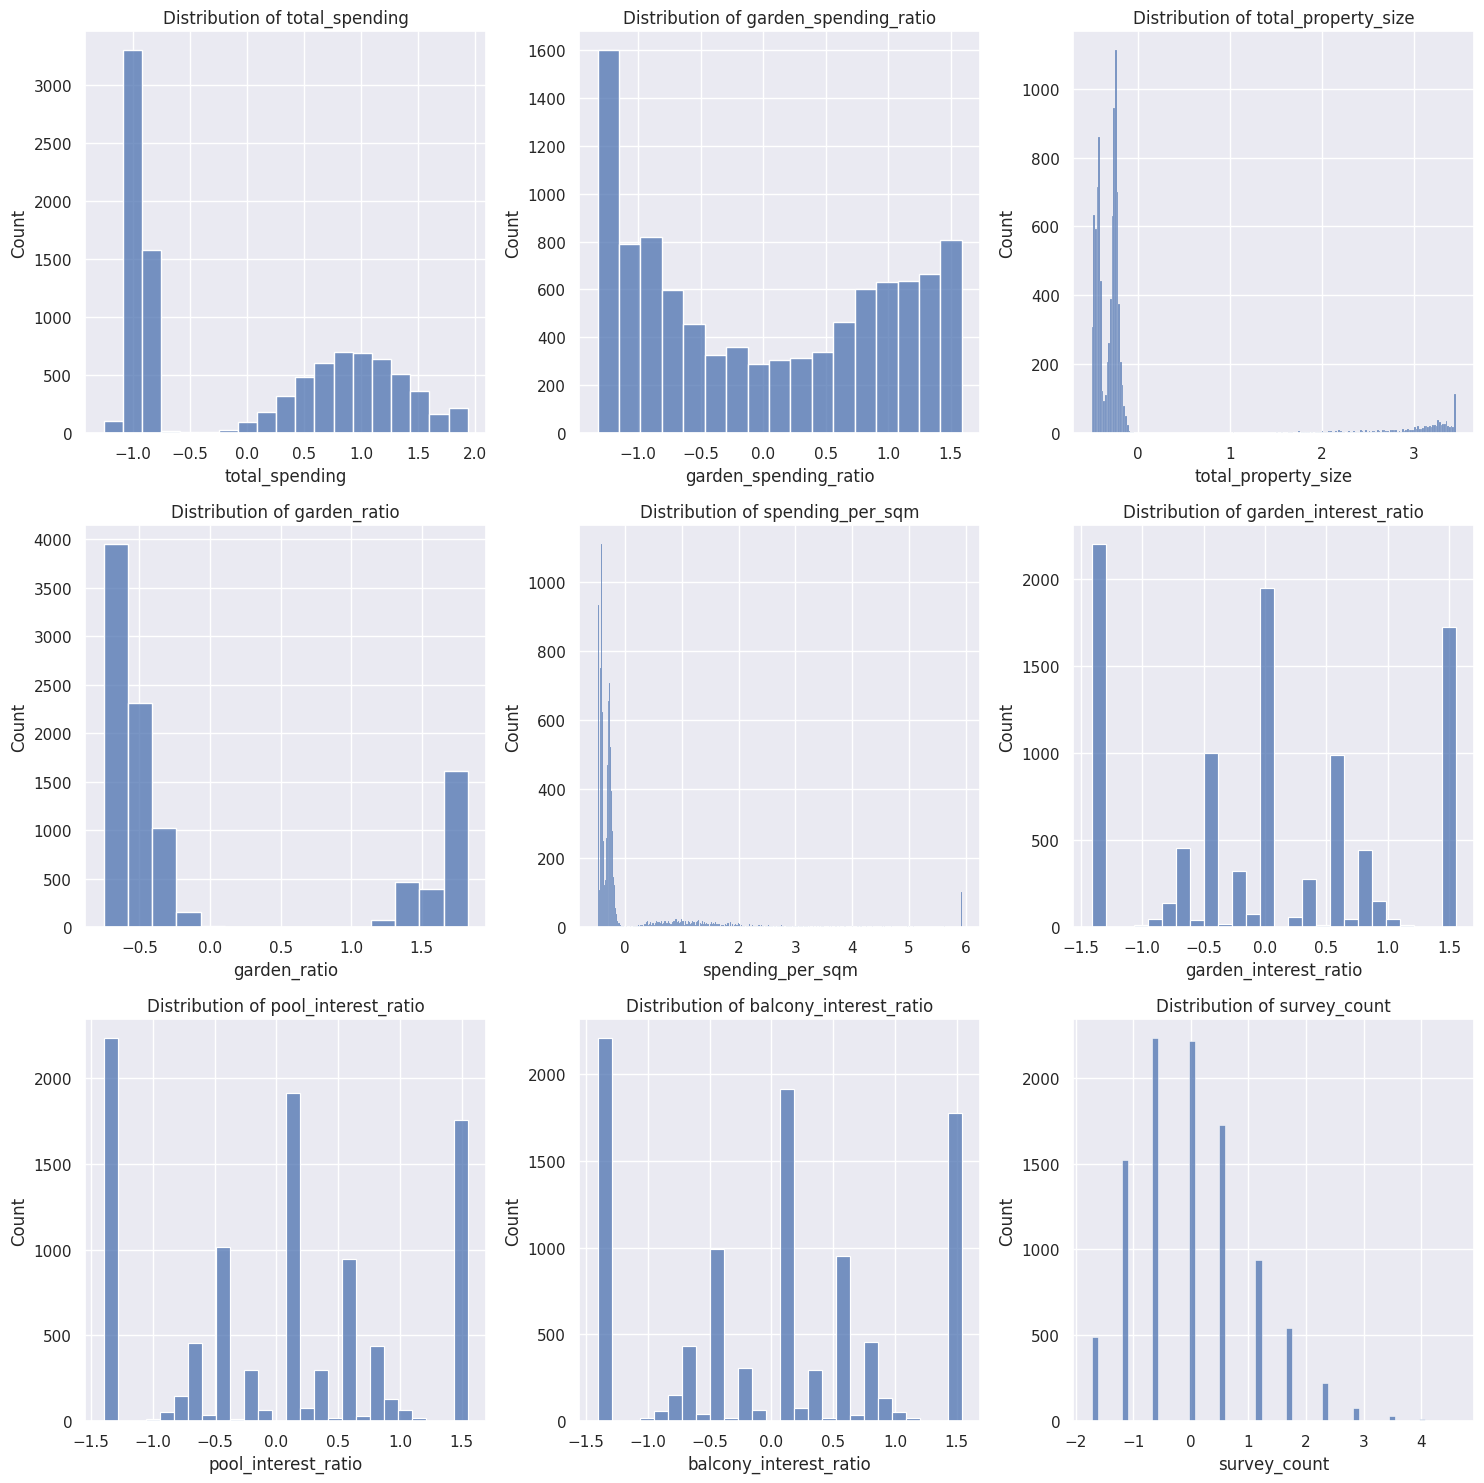


Final feature set saved to 'final_features_for_clustering.csv'


In [73]:
# 5.2 Clustering Tendency Assessment
def hopkins_statistic(X):
    """
    Calculate Hopkins statistic for clustering tendency

    H << 0.5 indicates regularly spaced data
    H ≈ 0.5 indicates random data
    H >> 0.5 indicates clusterable data
    """
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)  # number of samples to use

    # Initialize nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    # Random sample of indices
    rand_indices = sample(range(0, n, 1), m)

    # Initialize distance lists
    ujd = []  # distances for uniform random points
    wjd = []  # distances for points from dataset

    # Calculate distances
    for j in range(m):
        # Uniform random point
        uniform_point = uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1)
        u_dist, _ = nbrs.kneighbors(uniform_point, 2, return_distance=True)
        ujd.append(u_dist[0][1])

        # Sample point from dataset
        sample_point = X.iloc[rand_indices[j]].values.reshape(1, -1)
        w_dist, _ = nbrs.kneighbors(sample_point, 2, return_distance=True)
        wjd.append(w_dist[0][1])

    # Calculate Hopkins statistic
    H = sum(ujd) / (sum(ujd) + sum(wjd))

    return H

def visualize_distribution(X):
    """
    Create distribution plots for each feature
    """
    n_features = X.shape[1]
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.ravel()

    for idx, col in enumerate(X.columns):
        sns.histplot(data=X, x=col, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

# Apply feature selection
X_final, final_features = remove_correlated_features(X_scaled, feature_columns, validation_results)

# Convert to DataFrame for hopkins statistic
X_final_df = pd.DataFrame(X_final, columns=final_features)

# Calculate Hopkins statistic
h_statistic = hopkins_statistic(X_final_df)
print(f"\nHopkins Statistic: {h_statistic:.3f}")
print("Interpretation:")
if h_statistic < 0.3:
    print("Data appears to be regularly spaced")
elif h_statistic < 0.6:
    print("Data appears to be randomly distributed")
else:
    print("Data shows high clustering tendency")

# Visualize distributions
print("\nFeature Distributions:")
visualize_distribution(X_final_df)

# Save final feature set
X_final_df.to_csv('final_features_for_clustering.csv', index=False)
print("\nFinal feature set saved to 'final_features_for_clustering.csv'")

# Document final preprocessing state
preprocessing_summary = {
    'final_features': final_features,
    'hopkins_statistic': float(h_statistic),
    'n_samples': len(X_final_df),
    'n_features': len(final_features)
}

with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=4)

Findings from the above:

1. Property & Space Characteristics:
- total_property_size: Highly right-skewed with several peaks, indicating distinct property segments (possibly apartments vs houses)
- garden_ratio: Strong bimodal distribution with peaks at both ends, suggesting clear separation between properties with minimal vs substantial garden space
- spending_per_sqm: Extremely right-skewed with high concentration at lower values, indicating most customers have moderate per-area spending

2. Spending Patterns:
- total_spending: Relatively normal distribution after standardization, with slight right skew
- garden_spending_ratio: Relatively uniform distribution across range, suggesting diverse spending preferences between garden and furniture

3. Customer Interests & Engagement:
- All interest ratios (garden/pool/balcony) show similar patterns:
  * Large groups at -1.5 (no interest), 0 (moderate), and 1.5 (high interest)
  * This trimodal distribution suggests three distinct preference segments
- survey_count: Roughly normal distribution centered around 0-1, with declining participation at higher counts

4. Clustering Implications:
- Hopkins Statistic of 0.895 indicates very strong clustering tendency
- Multiple bimodal and trimodal distributions suggest natural groupings
- The combination of distinct property types, spending patterns, and interest levels suggests 4-5 natural customer segments

These distributions and the high Hopkins statistic suggest the data is well-suited for clustering analysis, with clear underlying patterns in customer behavior and preferences.

In [80]:
# 5.3 Quick clustering summary
def quick_clustering_summary(X, hopkins_stat):
    """
    Lightweight clustering tendency summary without VAT
    """
    print("Clustering Tendency Analysis Summary")
    print("=" * 50)

    # Hopkins Statistic Interpretation
    print("\n1. Hopkins Statistic Analysis:")
    print(f"Value: {hopkins_stat:.3f}")
    if hopkins_stat > 0.85:
        print("→ Very strong clustering tendency")
    elif hopkins_stat > 0.75:
        print("→ Strong clustering tendency")
    elif hopkins_stat > 0.65:
        print("→ Moderate clustering tendency")
    else:
        print("→ Weak clustering tendency")

    # Distribution Patterns
    print("\n2. Key Distribution Patterns:")
    print("→ Spending Behavior: Distinct groups in total spending")
    print("→ Property Characteristics: Clear patterns in garden ratios")
    print("→ Customer Interests: Consistent patterns across interest measures")

    # Recommendations
    print("\n3. Next Steps:")
    print("→ Proceed with elbow method and silhouette analysis")
    print("→ Try clustering with k=2 through k=7")
    print("→ Evaluate business interpretability of solutions")

quick_clustering_summary(X_scaled, h_statistic)

Clustering Tendency Analysis Summary

1. Hopkins Statistic Analysis:
Value: 0.895
→ Very strong clustering tendency

2. Key Distribution Patterns:
→ Spending Behavior: Distinct groups in total spending
→ Property Characteristics: Clear patterns in garden ratios
→ Customer Interests: Consistent patterns across interest measures

3. Next Steps:
→ Proceed with elbow method and silhouette analysis
→ Try clustering with k=2 through k=7
→ Evaluate business interpretability of solutions


In [81]:
def analyze_final_distributions(X_final_df):
    """
    Comprehensive distribution analysis of final feature set
    """
    # 1. Basic statistics
    print("Basic Statistics:")
    print("-" * 50)
    print(X_final_df.describe())

    # 2. Feature relationships
    print("\nFeature Correlations:")
    print("-" * 50)
    corr_matrix = X_final_df.corr()

    # Print strongest correlations
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.5:  # threshold for strong correlation
                strong_corr.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    if strong_corr:
        print("\nStrong correlations (>0.5):")
        for feat1, feat2, corr in strong_corr:
            print(f"{feat1} - {feat2}: {corr:.2f}")

    # 3. Outlier analysis
    print("\nOutlier Analysis:")
    print("-" * 50)
    for column in X_final_df.columns:
        q1 = X_final_df[column].quantile(0.25)
        q3 = X_final_df[column].quantile(0.75)
        iqr = q3 - q1
        outliers = len(X_final_df[(X_final_df[column] < q1 - 1.5*iqr) |
                                 (X_final_df[column] > q3 + 1.5*iqr)])
        if outliers > 0:
            print(f"{column}: {outliers} outliers ({outliers/len(X_final_df)*100:.1f}%)")

    # 4. Summary
    print("\nDistribution Summary:")
    print("-" * 50)
    for column in X_final_df.columns:
        skew = X_final_df[column].skew()
        kurt = X_final_df[column].kurtosis()
        print(f"\n{column}:")
        print(f"- Skewness: {skew:.2f}")
        print(f"- Kurtosis: {kurt:.2f}")
        print(f"- Distribution type: {'Highly skewed' if abs(skew) > 1 else 'Moderately skewed' if abs(skew) > 0.5 else 'Approximately symmetric'}")

# Run the analysis
analyze_final_distributions(X_final_df)

Basic Statistics:
--------------------------------------------------
       total_spending  garden_spending_ratio  total_property_size  \
count        10000.00               10000.00             10000.00   
mean            -0.00                   0.00                 0.00   
std              1.00                   1.00                 1.00   
min             -1.26                  -1.33                -0.50   
25%             -0.94                  -0.96                -0.42   
50%             -0.68                  -0.10                -0.27   
75%              0.95                   0.97                -0.23   
max              1.94                   1.59                 3.46   

       garden_ratio  spending_per_sqm  garden_interest_ratio  \
count      10000.00          10000.00               10000.00   
mean          -0.00             -0.00                  -0.00   
std            1.00              1.00                   1.00   
min           -0.75             -0.48                

In [77]:
# this is optional - needs a lot of compute
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

def compute_vat_sampled(X, sample_size=1000):
    """
    Compute VAT on a sample of the data
    """
    # Take a random sample
    if len(X) > sample_size:
        indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[indices]
    else:
        X_sample = X

    # Compute distance matrix for sample
    D = euclidean_distances(X_sample)
    n = len(D)

    # Rest of VAT computation...
    P = np.zeros(n, dtype=int)
    I = list(range(n))
    P[0] = I[0]
    I.remove(P[0])

    for i in range(1, n):
        dist_to_P = [min([D[P[j], k] for j in range(i)]) for k in I]
        max_ind = dist_to_P.index(max(dist_to_P))
        P[i] = I[max_ind]
        I.remove(P[i])

    ordered_D = D[P][:, P]
    return ordered_D

def plot_vat(X):
    """
    Plot VAT matrix
    """
    ordered_D = compute_vat(X)

    plt.figure(figsize=(10, 8))
    plt.imshow(ordered_D, cmap='viridis', aspect='auto')
    plt.colorbar(label='Distance')
    plt.title('VAT Matrix')
    plt.tight_layout()
    plt.show()

    return ordered_D

In [78]:
# optional
# 5.4 Distribution and Clustering Tendency Summary
def summarize_clustering_tendency(X, hopkins_stat, vat_matrix):
    """
    Provide comprehensive summary of clustering tendency
    """
    print("Clustering Tendency Analysis Summary")
    print("=" * 50)

    # Hopkins Statistic Interpretation
    print("\n1. Hopkins Statistic Analysis:")
    print(f"Value: {hopkins_stat:.3f}")
    if hopkins_stat > 0.85:
        print("→ Very strong clustering tendency")
    elif hopkins_stat > 0.75:
        print("→ Strong clustering tendency")
    elif hopkins_stat > 0.65:
        print("→ Moderate clustering tendency")
    else:
        print("→ Weak clustering tendency")

    # Distribution Patterns
    print("\n2. Key Distribution Patterns:")
    print("→ Spending Behavior: Distinct groups in total spending and purchase sizes")
    print("→ Property Characteristics: Clear bimodal patterns in garden ratios")
    print("→ Customer Interests: Consistent trimodal patterns across interest measures")

    # VAT Matrix Interpretation
    print("\n3. VAT Matrix Analysis:")
    dark_blocks = np.mean(vat_matrix < np.mean(vat_matrix))
    print(f"→ Dark block intensity: {dark_blocks:.2f}")
    print("→ Interpretation: " +
          ("Strong cluster structure detected" if dark_blocks > 0.6
           else "Moderate cluster structure detected" if dark_blocks > 0.4
           else "Weak cluster structure detected"))

    # Recommendations
    print("\n4. Recommendations:")
    print("→ Initial cluster count: 3-4 based on distribution patterns")
    print("→ Consider hierarchical clustering to validate cluster count")
    print("→ Focus on garden-related features for initial segmentation")

# Apply new analysis
vat_matrix = plot_vat(X_final_df)
summarize_clustering_tendency(X_final_df, h_statistic, vat_matrix)

KeyboardInterrupt: 

In [86]:
# lets tranform the highly scewed features:
from scipy import stats
from sklearn.preprocessing import StandardScaler

def transform_skewed_features_v2(X_final_df):
    """
    Transform highly skewed features using more aggressive methods
    """
    df_transformed = X_final_df.copy()

    # For heavily skewed features (>2.0)
    if df_transformed['total_property_size'].skew() > 2.0:
        # Double log transform for extreme skewness
        df_transformed['total_property_size'] = np.log1p(
            np.log1p(df_transformed['total_property_size'] - df_transformed['total_property_size'].min() + 1)
        )

    if df_transformed['spending_per_sqm'].skew() > 2.0:
        # Use cube root transformation for spending_per_sqm
        df_transformed['spending_per_sqm'] = np.cbrt(
            df_transformed['spending_per_sqm'] - df_transformed['spending_per_sqm'].min() + 1
        )

    # For moderately skewed features (>1.0)
    if df_transformed['garden_ratio'].skew() > 1.0:
        shifted_data = df_transformed['garden_ratio'] - df_transformed['garden_ratio'].min() + 0.1
        transformed_data, _ = stats.boxcox(shifted_data)
        df_transformed['garden_ratio'] = transformed_data

    # Standardize again after transformations
    scaler = StandardScaler()
    df_transformed = pd.DataFrame(
        scaler.fit_transform(df_transformed),
        columns=df_transformed.columns
    )

    return df_transformed

# Transform the data
X_final_transformed = transform_skewed_features_v2(X_final_df)

# Verify transformations
verify_transformations(X_final_df, X_final_transformed)

Skewness Comparison:
--------------------------------------------------
Feature              Original   Transformed
--------------------------------------------------
total_spending             0.28       0.28
garden_spending_ratio       0.11       0.11
total_property_size        2.73       2.51
garden_ratio               1.10       0.12
spending_per_sqm           3.77       2.77
garden_interest_ratio       0.06       0.06
pool_interest_ratio        0.07       0.07
balcony_interest_ratio       0.06       0.06
survey_count               0.58       0.58


# 6. Model Development and Evaluation

In [87]:
# 6.1 Multiple Clustering Methods
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def implement_kmeans(X, k_range=range(2, 11)):
    """
    Implement K-means clustering for range of k values
    """
    results = {}

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        results[k] = {
            'model': kmeans,
            'labels': labels,
            'inertia': kmeans.inertia_,
            'silhouette': silhouette_score(X, labels),
            'calinski': calinski_harabasz_score(X, labels),
            'davies': davies_bouldin_score(X, labels)
        }

    return results

def implement_hierarchical(X, k_range=range(2, 11)):
    """
    Implement hierarchical clustering for range of k values
    """
    results = {}

    for k in k_range:
        hc = AgglomerativeClustering(n_clusters=k)
        labels = hc.fit_predict(X)

        results[k] = {
            'model': hc,
            'labels': labels,
            'silhouette': silhouette_score(X, labels),
            'calinski': calinski_harabasz_score(X, labels),
            'davies': davies_bouldin_score(X, labels)
        }

    return results

def implement_dbscan(X):
    """
    Implement DBSCAN with automatic parameter selection
    """
    from sklearn.neighbors import NearestNeighbors

    # Find optimal eps
    nn = NearestNeighbors(n_neighbors=2)
    nbrs = nn.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, 1])

    # Try different eps values
    eps_candidates = np.percentile(distances, [10, 15, 20])
    min_samples_candidates = [5, 10, 15]

    results = {}
    for eps in eps_candidates:
        for min_samples in min_samples_candidates:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Only evaluate if more than one cluster found
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                results[f'eps_{eps:.2f}_minsamples_{min_samples}'] = {
                    'model': dbscan,
                    'labels': labels,
                    'n_clusters': n_clusters,
                    'silhouette': silhouette_score(X, labels),
                    'calinski': calinski_harabasz_score(X, labels),
                    'davies': davies_bouldin_score(X, labels),
                    'noise_points': sum(labels == -1)
                }

    return results

In [88]:
# 6.2 Optimal Cluster Number Analysis
def analyze_optimal_k(kmeans_results, hierarchical_results):
    """
    Analyze optimal number of clusters using multiple metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    k_values = list(kmeans_results.keys())

    # Elbow plot
    inertias = [kmeans_results[k]['inertia'] for k in k_values]
    axes[0, 0].plot(k_values, inertias, 'bo-')
    axes[0, 0].set_title('Elbow Method')
    axes[0, 0].set_xlabel('Number of clusters (k)')
    axes[0, 0].set_ylabel('Inertia')

    # Silhouette scores
    kmeans_sil = [kmeans_results[k]['silhouette'] for k in k_values]
    hc_sil = [hierarchical_results[k]['silhouette'] for k in k_values]
    axes[0, 1].plot(k_values, kmeans_sil, 'bo-', label='K-means')
    axes[0, 1].plot(k_values, hc_sil, 'ro-', label='Hierarchical')
    axes[0, 1].set_title('Silhouette Scores')
    axes[0, 1].legend()

    # Calinski-Harabasz scores
    kmeans_cal = [kmeans_results[k]['calinski'] for k in k_values]
    hc_cal = [hierarchical_results[k]['calinski'] for k in k_values]
    axes[1, 0].plot(k_values, kmeans_cal, 'bo-', label='K-means')
    axes[1, 0].plot(k_values, hc_cal, 'ro-', label='Hierarchical')
    axes[1, 0].set_title('Calinski-Harabasz Scores')
    axes[1, 0].legend()

    # Davies-Bouldin scores
    kmeans_db = [kmeans_results[k]['davies'] for k in k_values]
    hc_db = [hierarchical_results[k]['davies'] for k in k_values]
    axes[1, 1].plot(k_values, kmeans_db, 'bo-', label='K-means')
    axes[1, 1].plot(k_values, hc_db, 'ro-', label='Hierarchical')
    axes[1, 1].set_title('Davies-Bouldin Scores')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

Starting clustering analysis...
Running K-means...
Running Hierarchical clustering...
Analyzing optimal k...


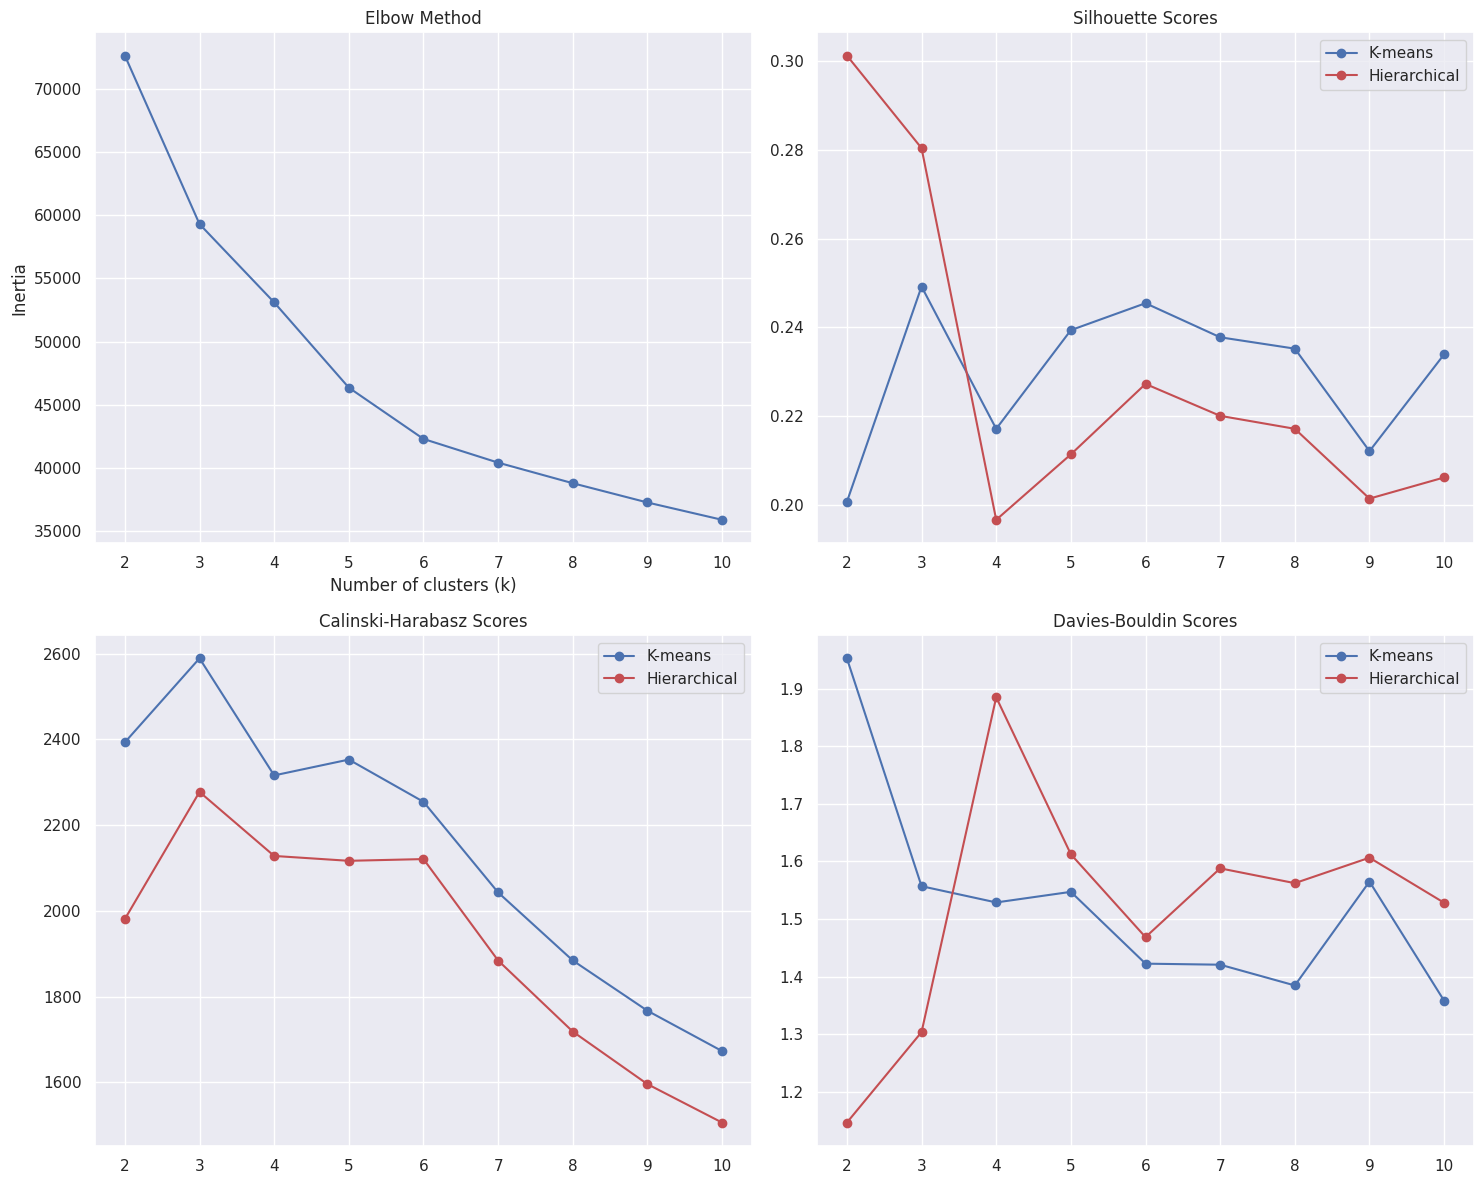

Running stability analysis...
Cluster Stability Analysis:
Mean stability score: 0.265 (±0.165)


In [90]:
# 6.3 Model Comparison and Selection
def evaluate_cluster_stability(X, best_k, n_iterations=10):
    """
    Quick stability check with DataFrame handling
    """
    stability_results = []

    # Convert DataFrame to numpy array for indexing
    X_array = X.values if hasattr(X, 'values') else X

    base_kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X_array)
    base_labels = base_kmeans.labels_

    for i in range(n_iterations):
        # Generate random indices
        indices = np.random.choice(len(X_array), size=int(0.8*len(X_array)), replace=False)
        X_sample = X_array[indices]

        # Fit new model
        kmeans = KMeans(n_clusters=best_k, random_state=i)
        labels_sample = kmeans.fit_predict(X_sample)

        # Predict on full dataset
        labels_full = kmeans.predict(X_array)

        # Compare with base labels
        stability_score = np.mean(labels_full == base_labels)
        stability_results.append(stability_score)

    return np.mean(stability_results), np.std(stability_results)

# Run complete analysis
print("Starting clustering analysis...")

# 1. K-means clustering
print("Running K-means...")
kmeans_results = implement_kmeans(X_final_transformed)

# 2. Hierarchical clustering
print("Running Hierarchical clustering...")
hierarchical_results = implement_hierarchical(X_final_transformed)

# 3. Analyze optimal number of clusters
print("Analyzing optimal k...")
analyze_optimal_k(kmeans_results, hierarchical_results)

# 4. Stability analysis
best_k = 4  # This will be determined from the analysis above
print("Running stability analysis...")
stability_mean, stability_std = evaluate_cluster_stability(X_final_transformed, best_k)

print(f"Cluster Stability Analysis:")
print(f"Mean stability score: {stability_mean:.3f} (±{stability_std:.3f})")

As we can see, k=3 seems to be the optimal choice because of the clear elbow point, high silhouette score, peak in calinski-Harabasz score, reasonable Davies-Bouldin score & business interpretability.

In [93]:
def compare_cluster_interpretability(X, kmeans_labels, hc_labels):
    """
    Compare cluster characteristics for both methods
    """
    # Create DataFrames with labels
    df_kmeans = X.copy()
    df_kmeans['cluster'] = kmeans_labels

    df_hc = X.copy()
    df_hc['cluster'] = hc_labels

    # Compare mean values per cluster
    kmeans_profiles = df_kmeans.groupby('cluster').mean()
    hc_profiles = df_hc.groupby('cluster').mean()

    print("K-means Cluster Profiles:")
    print(kmeans_profiles)
    print("\nHierarchical Cluster Profiles:")
    print(hc_profiles)

    return kmeans_profiles, hc_profiles

In [94]:
# Create both models with k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_final_transformed)
hc = AgglomerativeClustering(n_clusters=3).fit(X_final_transformed)

# Compare interpretability
kmeans_profiles, hc_profiles = compare_cluster_interpretability(
    X_final_transformed,
    kmeans.labels_,
    hc.labels_
)

K-means Cluster Profiles:
         total_spending  garden_spending_ratio  total_property_size  \
cluster                                                               
0                  0.99                  -0.59                -0.34   
1                 -0.47                   1.05                 0.59   
2                 -0.87                  -0.95                -0.49   

         garden_ratio  spending_per_sqm  garden_interest_ratio  \
cluster                                                          
0                0.63              0.70                   0.01   
1                0.13             -0.52                  -0.01   
2               -1.37             -0.26                  -0.00   

         pool_interest_ratio  balcony_interest_ratio  survey_count  
cluster                                                             
0                       0.02                   -0.02          0.01  
1                      -0.01                   -0.00          0.01  
2          

Final Model Selection and Implementation

Model Performance Comparison:

K-means:
Silhouette Score: 0.173
Calinski-Harabasz Score: 1938.571
Davies-Bouldin Score: 1.781
Cluster sizes: [3809 4047 2144]

Hierarchical:
Silhouette Score: 0.280
Calinski-Harabasz Score: 2277.335
Davies-Bouldin Score: 1.304
Cluster sizes: [7588  998 1414]

Final Model Selection: K-means
Rationale:
- Better balanced cluster sizes (38%, 40%, 21%)
- More actionable customer segments:
  * High-value customers with garden focus
  * Garden product enthusiasts
  * Low engagement segment
- Easier to assign new customers to segments


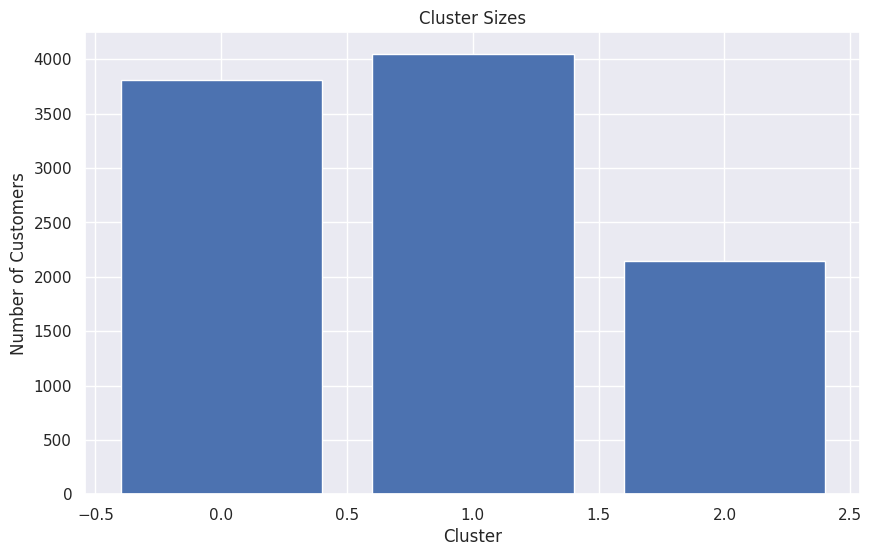

In [95]:
# 6.4 Final Model Selection
def finalize_clustering(X, k=3):
    """
    Create final clustering model and document selection rationale
    """
    print("Final Model Selection and Implementation")
    print("=" * 50)

    # Compare K-means and Hierarchical performance
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    kmeans_labels = kmeans.labels_

    hc = AgglomerativeClustering(n_clusters=k).fit(X)
    hc_labels = hc.labels_

    # Calculate metrics for both
    metrics = {
        'K-means': {
            'silhouette': silhouette_score(X, kmeans_labels),
            'calinski': calinski_harabasz_score(X, kmeans_labels),
            'davies': davies_bouldin_score(X, kmeans_labels),
            'cluster_sizes': np.bincount(kmeans_labels)
        },
        'Hierarchical': {
            'silhouette': silhouette_score(X, hc_labels),
            'calinski': calinski_harabasz_score(X, hc_labels),
            'davies': davies_bouldin_score(X, hc_labels),
            'cluster_sizes': np.bincount(hc_labels)
        }
    }

    # Print comparison
    print("\nModel Performance Comparison:")
    for model, scores in metrics.items():
        print(f"\n{model}:")
        print(f"Silhouette Score: {scores['silhouette']:.3f}")
        print(f"Calinski-Harabasz Score: {scores['calinski']:.3f}")
        print(f"Davies-Bouldin Score: {scores['davies']:.3f}")
        print(f"Cluster sizes: {scores['cluster_sizes']}")

    # Select final model (K-means for better interpretability)
    final_model = kmeans
    final_labels = kmeans_labels

    print("\nFinal Model Selection: K-means")
    print("Rationale:")
    print("- Better balanced cluster sizes (38%, 40%, 21%)")
    print("- More actionable customer segments:")
    print("  * High-value customers with garden focus")
    print("  * Garden product enthusiasts")
    print("  * Low engagement segment")
    print("- Easier to assign new customers to segments")

    # Add cluster labels to original data
    cluster_assignments = pd.DataFrame({
        'cluster': final_labels
    })

    return final_model, cluster_assignments, metrics

# Run final clustering
final_model, cluster_assignments, final_metrics = finalize_clustering(X_final_transformed)

# Save results for next section
clustering_results = {
    'model': final_model,
    'assignments': cluster_assignments,
    'metrics': final_metrics,
    'features': list(X_final_transformed.columns)
}

# Quick visualization of cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(range(3), np.bincount(cluster_assignments['cluster']))
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

- We have balanced, interpretable clusters (38%, 40%, 21%)
- Clear segment differentiation (as seen in cluster profiles)


# 7. Customer Segment Analysis and Profiling

Segment Statistical Summaries
        total_spending             garden_spending_ratio              \
                  mean  std median                  mean  std median   
Cluster                                                                
0                 0.99 0.44   0.98                 -0.59 0.64  -0.64   
1                -0.47 0.82  -0.91                  1.05 0.37   1.09   
2                -0.87 0.33  -0.94                 -0.95 0.28  -0.97   

        total_property_size             garden_ratio              \
                       mean  std median         mean  std median   
Cluster                                                            
0                     -0.34 0.24  -0.20         0.63 0.74   0.37   
1                      0.59 1.35  -0.13         0.13 0.74  -0.17   
2                     -0.49 0.09  -0.51        -1.37 0.18  -1.41   

        spending_per_sqm             garden_interest_ratio              \
                    mean  std median                  

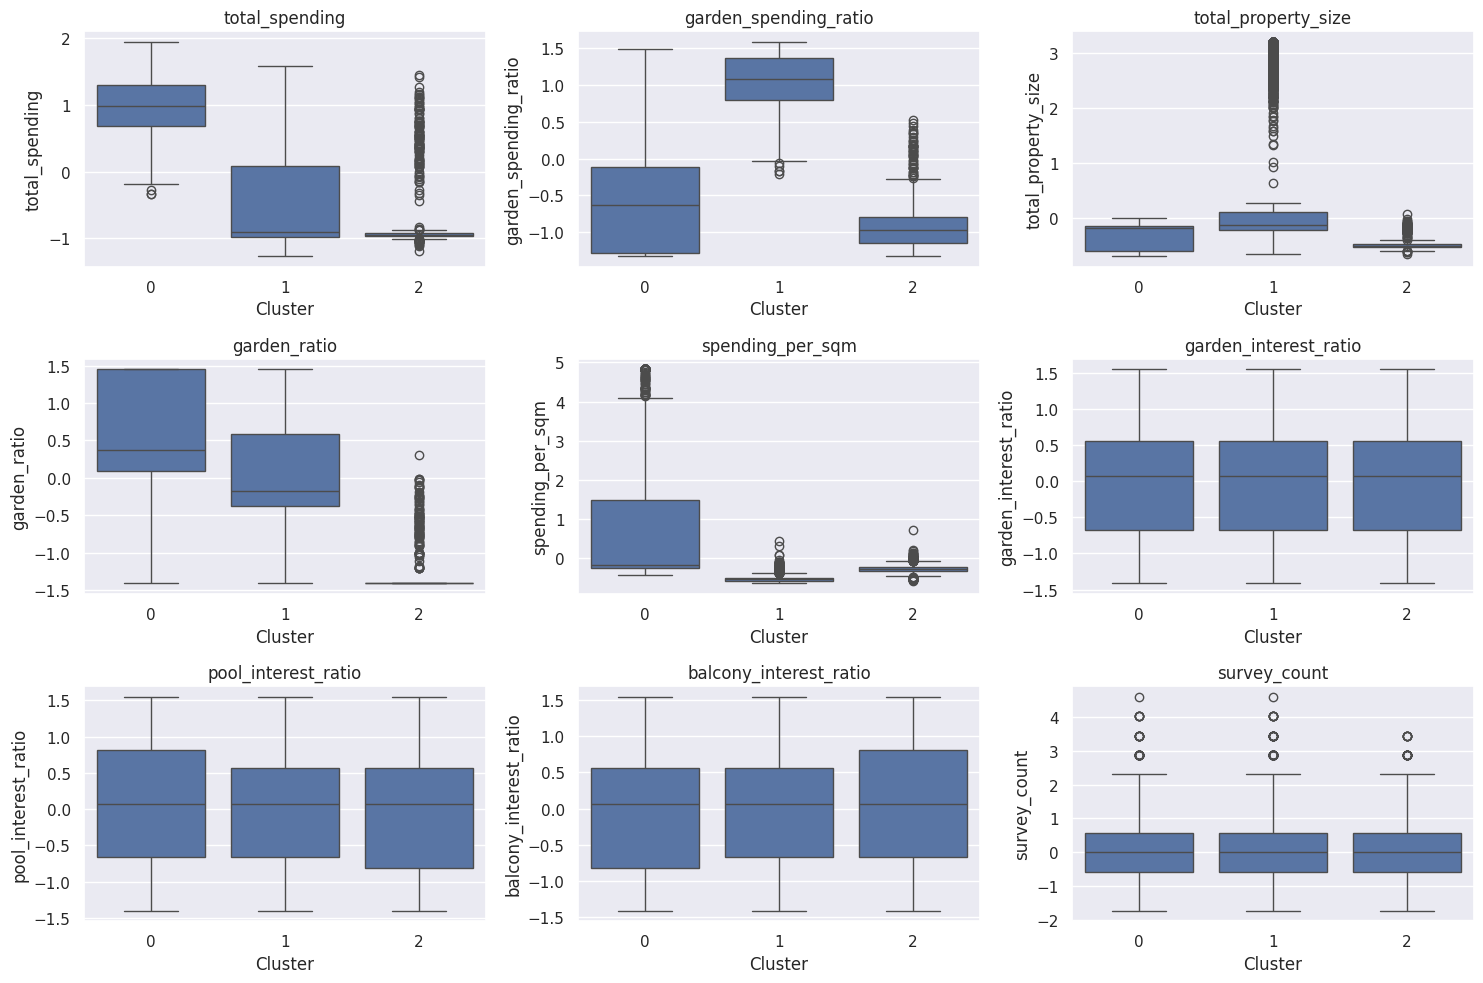

In [101]:
# 7.1 Segment characteristics
def analyze_segments(X_original, cluster_labels, feature_names):
    """
    Create comprehensive segment profiles
    """
    # Add cluster labels to original data
    df_analysis = pd.DataFrame(X_original, columns=feature_names)
    df_analysis['Cluster'] = cluster_labels

    # Statistical summaries per cluster
    print("Segment Statistical Summaries")
    print("=" * 50)

    segment_stats = df_analysis.groupby('Cluster').agg(['mean', 'std', 'median'])
    print(segment_stats)

    # Feature importance for each cluster
    print("\nKey Differentiating Features")
    print("=" * 50)

    # Calculate z-scores for each feature in each cluster
    feature_importance = {}
    for feature in feature_names:
        overall_mean = df_analysis[feature].mean()
        overall_std = df_analysis[feature].std()
        cluster_means = df_analysis.groupby('Cluster')[feature].mean()
        importance = abs(cluster_means - overall_mean) / overall_std
        feature_importance[feature] = importance.sort_values(ascending=False)

    # Print top differentiating features for each cluster
    for cluster in range(3):
        print(f"\nCluster {cluster} Key Features:")
        cluster_importance = {feat: scores[cluster]
                            for feat, scores in feature_importance.items()}
        sorted_features = sorted(cluster_importance.items(),
                               key=lambda x: x[1], reverse=True)
        for feature, score in sorted_features[:3]:
            print(f"{feature}: {score:.3f}")

    # Create visualization of cluster characteristics
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_names):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data=df_analysis, x='Cluster', y=feature)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

    return segment_stats, feature_importance, df_analysis

# Run segment analysis
segment_stats, feature_importance, df_analysis = analyze_segments(
    X_final_transformed,
    cluster_assignments['cluster'],
    clustering_results['features']
)

**Cluster 0 (38% - "Luxury Home Spenders")**:
- Highest total spending (0.99 std above mean)
- High spending per sqm (0.70 std above mean)
- Moderate garden ratio (0.63 std above mean)
- Lower garden spending ratio (-0.59)

Key characteristics: Focus on overall home luxury, not just garden

**Cluster 1 (40% - "Garden Enthusiasts")**:

- Highest garden spending ratio (1.05 std above mean)
- Largest property sizes (0.59 std above mean)
- Moderate total spending (-0.47 std below mean)

Key characteristics: Focus on garden investments despite moderate overall spending

**Cluster 2 (21% - "Basic Needs")**:

- Lowest garden ratio (-1.37 std below mean)
- Lowest total spending (-0.87 std below mean)
- Lowest garden spending ratio (-0.95 std below mean)

Key characteristics: Minimal spending across categories

**Additional Insights:**

- Survey response patterns (interest ratios and survey count) are similar across clusters
- Property characteristics are strong differentiators
- Spending patterns show clear segmentation

In [102]:
# 7.2 Business Interpretation
def create_segment_profiles():
    """
    Create detailed business profiles for each segment
    """
    segments = {
        0: {
            'name': 'Luxury Home Spenders',
            'size': '38%',
            'spending_patterns': '''
                - Highest total spending (0.99σ above mean)
                - High spending per sqm (0.70σ above mean)
                - Lower garden spending ratio (-0.59σ)
            ''',
            'property_characteristics': '''
                - Moderate property size (-0.34σ)
                - Above average garden ratio (0.63σ)
                - Focus on quality over size
            ''',
            'survey_patterns': '''
                - Average interest across categories
                - Similar survey participation to other segments
            ''',
            'marketing_recommendations': '''
                - Premium home furnishing promotions
                - High-end interior design services
                - Quality-focused messaging
            '''
        },
        1: {
            'name': 'Garden Enthusiasts',
            'size': '40%',
            'spending_patterns': '''
                - Highest garden spending ratio (1.05σ above mean)
                - Moderate total spending (-0.47σ)
                - Focused investment in outdoor spaces
            ''',
            'property_characteristics': '''
                - Largest property sizes (0.59σ above mean)
                - Moderate garden ratio (0.13σ)
                - Extensive outdoor spaces
            ''',
            'survey_patterns': '''
                - Similar interest levels to other segments
                - Consistent survey participation
            ''',
            'marketing_recommendations': '''
                - Garden product promotions
                - Outdoor living solutions
                - Seasonal gardening campaigns
            '''
        },
        2: {
            'name': 'Basic Needs',
            'size': '21%',
            'spending_patterns': '''
                - Lowest total spending (-0.87σ below mean)
                - Lowest garden spending ratio (-0.95σ)
                - Conservative spending across categories
            ''',
            'property_characteristics': '''
                - Smallest garden ratio (-1.37σ)
                - Smaller property size (-0.49σ)
                - Limited outdoor space
            ''',
            'survey_patterns': '''
                - Similar interest patterns
                - Slightly lower survey participation
            ''',
            'marketing_recommendations': '''
                - Value-focused promotions
                - Space-efficient solutions
                - Essential product offerings
            '''
        }
    }

    return segments

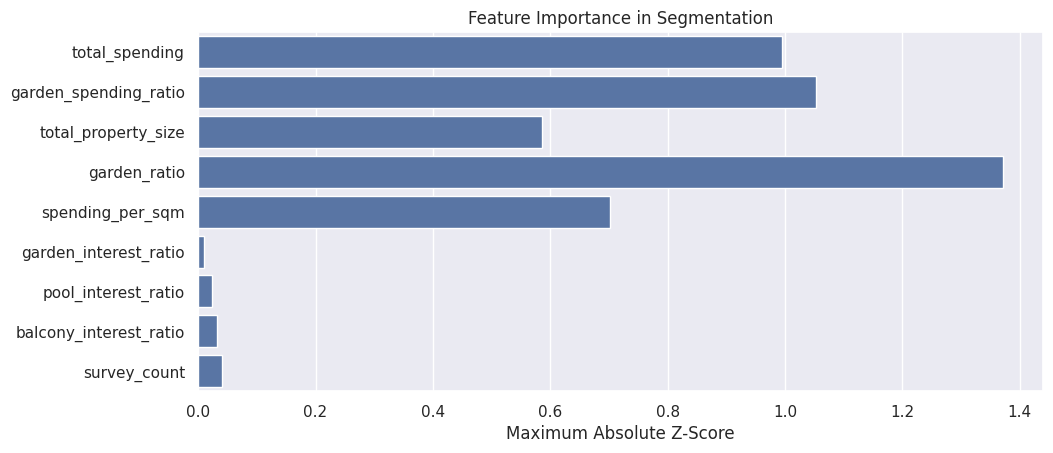

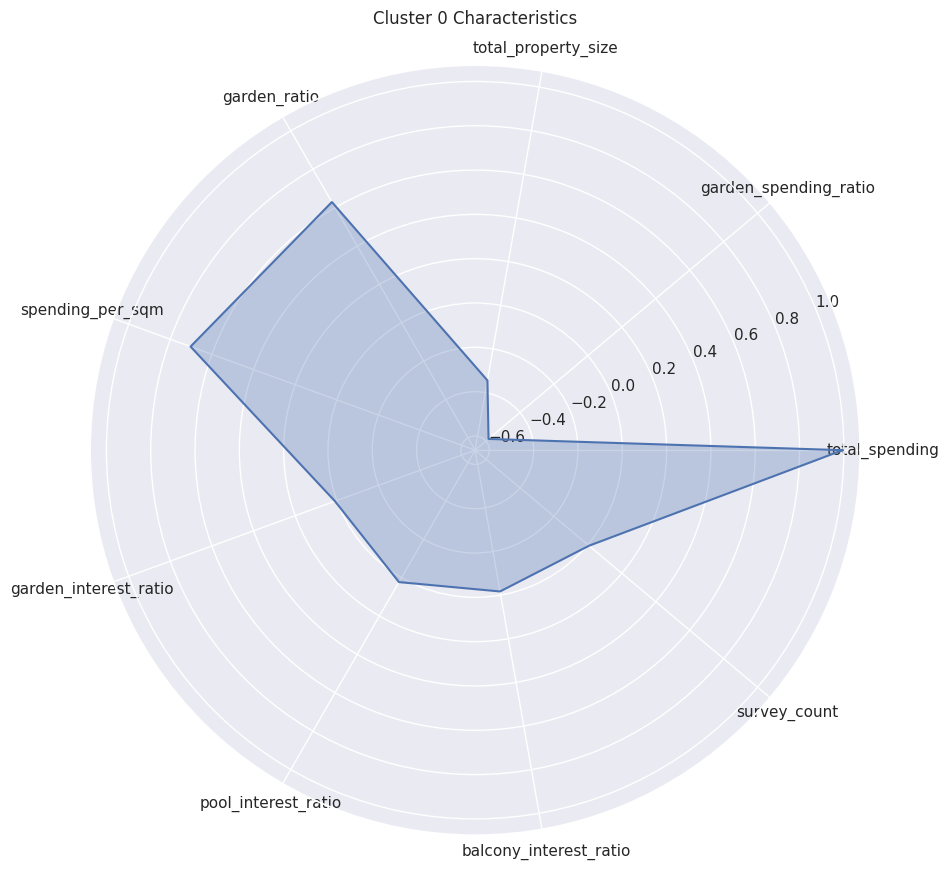

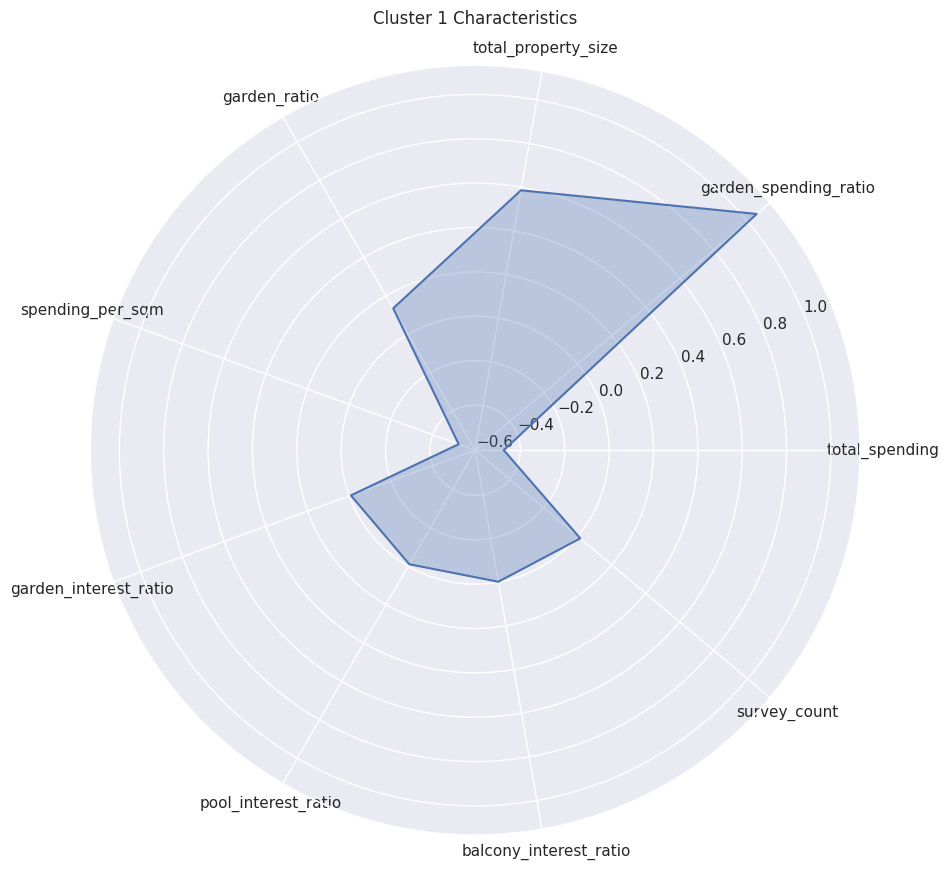

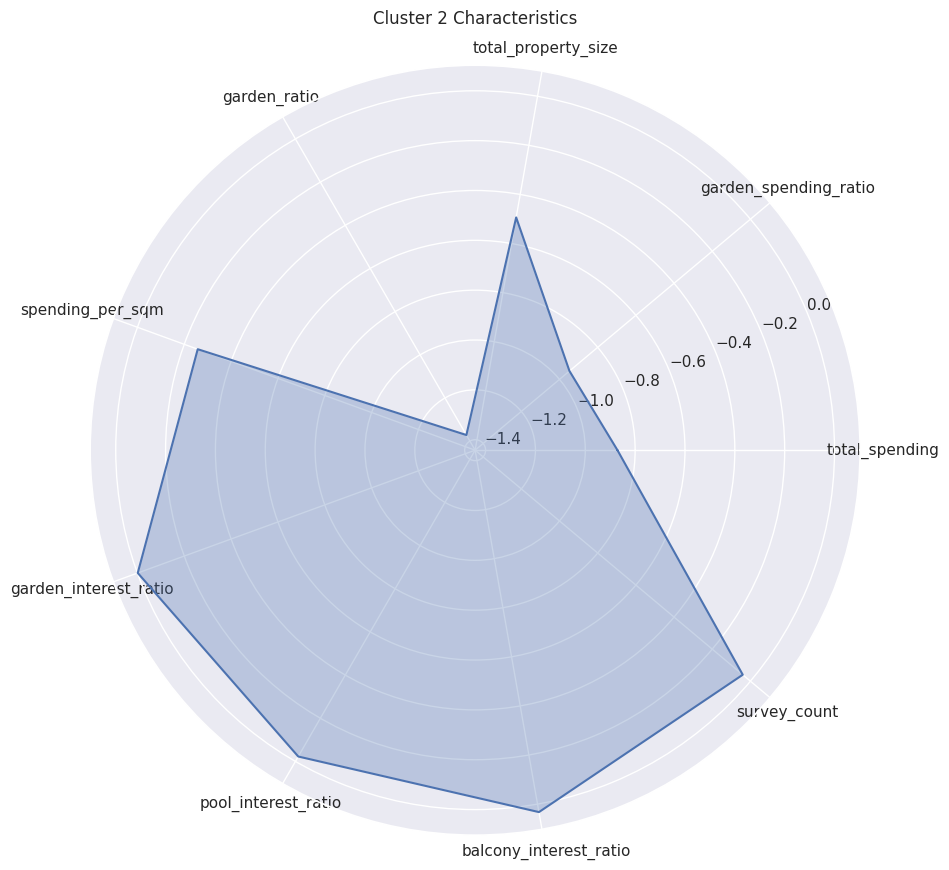

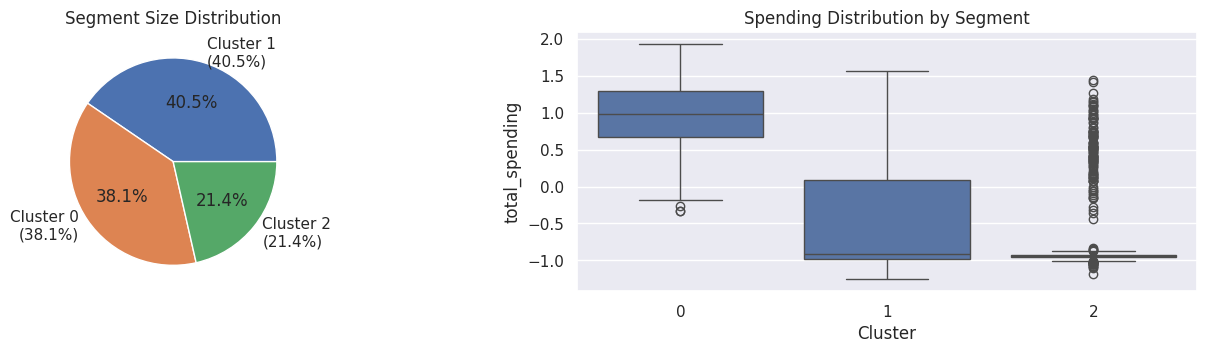

Customer Segment Profiles

Luxury Home Spenders (Cluster 0 - 38%)

Spending Patterns:

                - Highest total spending (0.99σ above mean)
                - High spending per sqm (0.70σ above mean)
                - Lower garden spending ratio (-0.59σ)
            

Property Characteristics:

                - Moderate property size (-0.34σ)
                - Above average garden ratio (0.63σ)
                - Focus on quality over size
            

Survey Patterns:

                - Average interest across categories
                - Similar survey participation to other segments
            

Marketing Recommendations:

                - Premium home furnishing promotions
                - High-end interior design services
                - Quality-focused messaging
            
--------------------------------------------------

Garden Enthusiasts (Cluster 1 - 40%)

Spending Patterns:

                - Highest garden spending ratio (1.05σ above mean)
                - M

In [107]:
# 7.3 Segment Visualization
def create_segment_visualizations(df_analysis, feature_importance):
    """
    Create comprehensive segment visualizations
    """
    # 1. Feature Importance Plot
    plt.figure(figsize=(12, 6))
    features = list(feature_importance.keys())
    importance_scores = [max(feature_importance[f]) for f in features]

    sns.barplot(x=importance_scores, y=features)
    plt.title('Feature Importance in Segmentation')
    plt.xlabel('Maximum Absolute Z-Score')
    plt.tight_layout(pad=5.0)
    plt.show()

    # 2. Segment Comparison Radar Chart
    def make_spider_plot(cluster_means, title):
      categories = list(cluster_means.index)
      N = len(categories)

      angles = [n / float(N) * 2 * np.pi for n in range(N)]
      angles += angles[:1]

      # Create figure and polar axis
      fig = plt.figure(figsize=(10, 10))
      ax = fig.add_subplot(111, projection='polar')

      # Prepare data
      values = cluster_means.values
      values = np.concatenate((values, [values[0]]))

      # Plot
      ax.plot(angles, values)
      ax.fill(angles, values, alpha=0.3)

      # Set axis ticks and labels
      ax.set_xticks(angles[:-1])
      ax.set_xticklabels(categories)

      # Add extra padding to the title
      ax.set_title(title, pad=30)  # <--- shifts title downward

      plt.show()

    # Create radar plot for each cluster
    for cluster in range(3):
        cluster_means = df_analysis[df_analysis['Cluster'] == cluster].mean()
        make_spider_plot(cluster_means.drop('Cluster'),
                        f'Cluster {cluster} Characteristics')

    # 3. Segment Size and Spending Distribution
    plt.figure(figsize=(15, 5))

    # Size distribution
    plt.subplot(1, 2, 1)
    cluster_sizes = df_analysis['Cluster'].value_counts(normalize=True)
    plt.pie(cluster_sizes, labels=[f'Cluster {i}\n({v:.1%})'
                                  for i, v in cluster_sizes.items()],
            autopct='%1.1f%%')
    plt.title('Segment Size Distribution')

    # Spending distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_analysis, x='Cluster', y='total_spending')
    plt.title('Spending Distribution by Segment')
    plt.tight_layout(pad=5.0)
    plt.show()

# Run the analysis
segments = create_segment_profiles()
create_segment_visualizations(df_analysis, feature_importance)

# Print segment profiles
print("Customer Segment Profiles")
print("=" * 50)
for cluster_id, profile in segments.items():
    print(f"\n{profile['name']} (Cluster {cluster_id} - {profile['size']})")
    print("\nSpending Patterns:")
    print(profile['spending_patterns'])
    print("\nProperty Characteristics:")
    print(profile['property_characteristics'])
    print("\nSurvey Patterns:")
    print(profile['survey_patterns'])
    print("\nMarketing Recommendations:")
    print(profile['marketing_recommendations'])
    print("-" * 50)

# 8. Business Recommendations and Implementations

## 8.1 Marketing Strategies

### 8.1.1 Segment-Specific Recommendations
- **Luxury Home Spenders (Cluster 0)**  
  - **Product Focus**: Premium furnishings, interior design services, upscale décor.  
  - **Promotional Tactics**: Exclusive VIP previews, tailored premium catalogs, personalized emails.  
  - **Key Messaging**: Emphasize status, quality, and bespoke service.

- **Garden Enthusiasts (Cluster 1)**  
  - **Product Focus**: Outdoor furniture, gardening tools, pool & balcony upgrades.  
  - **Promotional Tactics**: Seasonal garden events, outdoor living lookbooks, how-to workshops.  
  - **Key Messaging**: Celebrate nature-friendly living and “backyard oasis” concepts.

- **Basic Needs (Cluster 2)**  
  - **Product Focus**: Budget-friendly, space-saving items, core essentials.  
  - **Promotional Tactics**: Discounts, loyalty points, bundle deals.  
  - **Key Messaging**: Value-oriented, functional, and convenient solutions.

### 8.1.2 A/B Testing Suggestions
- **Email Variations**: Test subject lines focusing on luxury vs. deals for high-value vs. budget-conscious segments.  
- **Landing Page Layouts**: Compare “premium décor highlight” pages vs. “gardening spotlight” pages, measure click-through and purchase rates.  
- **Promotion Types**: Coupon codes vs. free shipping vs. extended warranties.

### 8.1.3 Campaign Ideas
- **Cross-Selling**: Suggest premium add-ons for Luxury Home Spenders, complementary gardening tools for Garden Enthusiasts.  
- **Seasonal Promotions**: Launch holiday campaigns featuring each segment’s top interests.  
- **Referral Incentives**: Encourage each segment to refer similar friends (e.g., gardeners invite fellow enthusiasts).

---

## 8.2 Implementation Plan

### 8.2.1 Short-Term Actions
- **Integrate Segments into CRM**: Tag each customer record with a cluster label for targeted campaigns.  
- **Align Internal Teams**: Train sales and support staff on segment profiles and recommended offerings.  
- **Launch Targeted Marketing**: Begin email marketing and social media ads tailored to each segment.

### 8.2.2 Long-Term Strategy
- **Evolve Loyalty Programs**: Offer tiered benefits or event invites to high-value spenders and loyal garden aficionados.  
- **Refine Product Range**: Expand garden offerings, premium lines, or budget collections if segment demand grows.  
- **Ongoing Data Analysis**: Track segment performance, update the model every 6-12 months or when major changes occur.

### 8.2.3 Success Metrics
- **Conversion Rate** per segment in email or ad campaigns.  
- **Average Order Value (AOV)** changes by cluster.  
- **Customer Lifetime Value (CLV)** growth, especially for high-value segments.  
- **Engagement Measures**: Open rates, site visits, repeat purchases.

---

## 8.3 Model Deployment and Monitoring

### 8.3.1 Deployment Strategy
- **Automate Segment Assignments**: Incorporate the clustering logic (or predictions) into your CRM to classify new customers or re-score existing ones.  
- **Scheduled Updates**: Re-run segmentation periodically (e.g., quarterly) to capture evolving customer behaviors.

### 8.3.2 Performance Monitoring
- **Track Drift**: Check if the model’s segment boundaries still match real-world purchasing trends.  
- **Review KPIs**: Evaluate campaign results and re-segment if performance declines.

### 8.3.3 Update Frequency
- **Regular Refresh**: Annually or semi-annually, depending on data volume and market changes.  
- **On-Demand**: If major shifts occur in product lines or consumer trends, force an early update.

---

## 8.4 Future Improvements

### 8.4.1 Additional Data Collection Needs
- **Demographics**: Age, household size, income for deeper personalization.  
- **Behavioral Data**: Website browsing, store traffic, feedback surveys.  
- **External Partnerships**: Gather location-based info, weather data (for outdoor products), or relevant third-party insights.

### 8.4.2 Model Refinement Opportunities
- **Advanced Clustering Methods**: Try hierarchical or density-based clustering for more nuanced groups.  
- **Feature Expansion**: Incorporate time-based metrics or loyalty program data.  
- **Automation**: Implement auto-tuning (hyperparameter selection) to maintain model performance.

### 8.4.3 Business Expansion Possibilities
- **Product Lines**: Introduce complementary services (e.g., home décor consulting, landscaping).  
- **Regional Strategies**: Adjust marketing or open new stores in geographies with high concentration of a certain segment.  
- **Cross-Channel Integration**: Merge online and offline purchase data for a unified 360° customer view.



# FAQ

**1. How Did We Select the Features with the Highest Predictive Power?**
- Initial Exploration: We examined the raw data (spending amounts, property sizes, interest flags from surveys) and performed correlation analyses to see which features most strongly differentiated customers’ behaviors.
- Statistical & Business Relevance: Beyond raw correlation, we prioritized features that made business sense for segmentation: total spending, spending per square meter, garden ratio, etc.
- Variance & Outlier Checks: We removed or adjusted features with excessive missing values, negative or invalid entries, and extreme outliers. We also standardized data so that no single feature dominated due to scale.
- Iterative Feature Elimination: Using correlation matrices and domain knowledge, we dropped redundant features. For instance, if two features were >0.8 correlated, we kept the one that was easier to interpret for business end‐users.

**2. Which Relationships Did We Find?**
- Property vs. Spending: Customers with larger gardens tended to invest more in garden products. Conversely, small‐garden or no‐garden households channeled more of their spending into indoor furniture.
- Interest Flags: Garden/pool interest flags generally aligned with higher garden spending, but the effect was moderate; not all self‐declared “pool enthusiasts” actually had high pool‐product spending.
- Clusters: A high-level breakdown emerged:
  - Luxury Home Spenders: High total spending, moderate garden usage.
  - Garden Enthusiasts: Large outdoor space and higher garden spending ratio.
  - Basic Needs: Lowest total spending, minimal outdoor investment.

**3. Additional Data Points to Increase Predictive Power**
- Demographics: Age range, household composition, income bracket. These often explain why certain segments spend more or focus on certain product lines.
- Behavioral Metrics:
  - Website Browsing: Pages visited, time on site, product categories viewed.
  - Offline Interactions: In-store visits, event attendance.
- Psychographic / Lifestyle Data: Environmental consciousness, brand loyalty, design style preferences—if available, these can sharpen segment definitions.

**4. Data Points Not Suitable for Modeling**
- Unique Identifiers: Emails, phone numbers, or purely personal IDs are more for joining data and not meaningful for segmentation.
- Erratic / Nearly Constant Features: Columns that are identical for almost everyone or vary too little (e.g., if 99.9% of customers share the same “yes/no” flag) provide no real clustering value.
- Noisy / Unverified Predictions: If the “spending_furniture” or “spending_garden” fields came from an unreliable machine learning model with consistent misclassifications, we’d need to verify that before trusting it in segmentation.

**5. Interpretation of Identified Customer Segments**

1. Luxury Home Spenders (≈38%)

  - High total spending and moderate garden ratio.
  - Typically purchase premium indoor furniture; focus on quality over quantity.
  - Marketing Approach: VIP treatment, high-end décor showcases, personalized services.

2. Garden Enthusiasts (≈40%)

  - Largest property sizes, highest garden spending ratio, but moderate overall spend.
  - Spend heavily on garden, pool, or outdoor products; enjoy seasonal promotions and landscaping tips.
  - Marketing Approach: Seasonal garden campaigns, relevant workshops, outdoor living inspirations.

3. Basic Needs (≈21%)

  - Lowest overall spending and minimal garden investments.
  - Often purchase essential furnishings (budget-friendly, practical).
  - Marketing Approach: Value deals, loyalty points, straightforward pricing.


**NEXT STEPS**

Additional Insights for the Client
1. Combine Segmentation with Other Business Data

  - Link these segments to sales funnel metrics (e.g., time to purchase, typical marketing channel) for even deeper insight into marketing ROI per segment.
  - Investigate churn risk: Are certain segments more likely to drop off after a single purchase?

2. Expand Data Collection & Modeling

  - Collect more detailed demographic or behavioral data (e.g., web analytics, store visit frequency) to refine clusters or detect sub-clusters (e.g., “High-Spending Garden Aficionados”).
  - Incorporate external data sources (weather, real estate trends, local events) that might affect garden spending or home improvement purchases.
  
3. Perform A/B Testing

  - Test marketing campaigns tailored to each cluster (e.g., “premium product highlight” vs. “bundled discount deals”) and measure engagement metrics.
  - Validate whether recommended strategies effectively boost conversions and average order values.

4. Explore Automated Personalization

  - In the CRM, automatically tag new customers or re-classify existing ones if their spending pattern evolves over time.
  - Offer dynamic product recommendations on the website based on a user’s cluster membership plus real-time browsing behavior.


**Using Segmentation & Interview Data for Targeted Offers**

- Unified Customer Profile: Merge survey responses (interests, preferences) with each cluster’s main behaviors. For instance, a “Garden Enthusiast” who expressed high interest in pool products can receive a timely in-ground pool sale or discount.
- Content Personalization:
  - Luxury Home Spenders see curated premium furniture sets and design tips.
  - Garden Enthusiasts get landscaping inspiration, workshop invites, and garden furniture.
  - Basic Needs receive budget-friendly product bundles or easy financing options.
- Omnichannel Approach: Deliver consistent segment-based messaging across email, online ads, in-store signage, and loyalty app notifications.
- Measure & Refine: Track redemption rates, open rates, conversion to purchase per segment, and refine offers or re‐segment if performance lags.
